# Research question

How to effectively predict sales values for US stores using a combination of sales data, store information, product information, accounting information, and weather data as features?

# Main Dataset used

    US Stores Sales

    Link: https://www.kaggle.com/datasets/dsfelix/us-stores-sales/data


## Description Main Dataset

This dataset contains information about Sales Values in Dollars ($) for American Stores.
The data set contains data from 2010 to 2011. 

The Sales are for products of the product types coffee, tea, espresso and herbal tea.

In particular, this dataset contains information about:

Stores' Area, State, Region and Size;
Products' ID, Description, Type, Category and Sale Date;
Accounting Info, such as Budget Margin, Profit, Total Expenses and Marking.


# Variable definition Main Dataset

##### The objective is to predict the sales of the stores in each day. Each row of our data contains the following information:

* Area Code - A numerical code representing a specific geographic area or region the store is located in.

* State - Store's US State

* Market - Store's Region

* Market Size - The size category of the market, indicating the scale or magnitude of business 

* Profit - Profits in Dollars

* Margin - Profit + Total Expenses OR Sales - COGS

* Sales - Values Acquired in Sales (Target value)

* COGS - is the cost of goods sold (raw materials, labor, manufacturing expenses)

* Total Expenses - Total Expenses to get the Product to Sell

* Marketing - Expenses in Marketing

* Inventory - Inventory Value of the Product in the Sale Moment

* Budget Profit - Expected Profit

* Budget COGS - Expected COGS

* Budget Margin - Expected Profit + Expected Total Expenses OR Expected Sales - Expected COGS

* Budget Sales - Expected Value Acquired in Sales

* ProductID - Product ID

* Date - Sale Date

* Product Type - Product Category

* Product - Product Description

* Type - Type.

## Additional Data: extracted via API (Longitude and Latitude)

In [ ]:
# Longitude and Latetude form API for the Area Code and State combination.
# As Query I used the "Area Code" and the "State"

## Second dataset (weather dataset via API)

In [ ]:
# Weather for the required timeframe (January 2010, January 2011) based on Longitude and Latitude vlaues.

# Preliminary exploratory analysis (main dataset data)
(inspection, scrutiny and analysis conducted on data before main analysis, to detect, manage and correct/treat errors)

In [1]:
# Importing Librarys
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sales.csv')

In [3]:
data.shape

(4248, 20)

In [4]:
data.head()

Area Code        State Market   Market Size  Profit  Margin  Sales   COGS  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   
1        203  Connecticut   East  Small Market    75.0   135.0  225.0   90.0   
2        203  Connecticut   East  Small Market   122.0   195.0  325.0  130.0   
3        203  Connecticut   East  Small Market   105.0   174.0  289.0  115.0   
4        203  Connecticut   East  Small Market   104.0   135.0  223.0   90.0   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0            69.0       38.0      962.0          110.0        110.0   
1            60.0       29.0     1148.0           90.0         80.0   
2            73.0       42.0     1134.0          130.0        110.0   
3            69.0       37.0     1166.0          110.0        100.0   
4            56.0       29.0     1148.0           90.0         80.0   

   Budget Margin  Budget Sales  ProductId               Date Product Type  \
0          160.0         270.0          2  04/01/10 00:00:00       Coffee   
1          130.0         210.0          2  07/01/10 00:00:00       Coffee   
2          180.0         290.0          2  11/01/10 00:00:00       Coffee   
3          160.0         260.0          2  12/01/10 00:00:00       Coffee   
4          130.0         210.0          2  07/01/11 00:00:00       Coffee   

     Product     Type  
0  Columbian  Regular  
1  Columbian  Regular  
2  Columbian  Regular  
3  Columbian  Regular  
4  Columbian  Regular

In [5]:
# Checking for Null value in the main dataset
data.isna().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [6]:
data.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
dtype: object

In [7]:
# The features seem to be in the right data types (Check the values Counts of all features), except date

In [8]:
# The Date value is given as datatype object and includes hours minutes and seconds 
    # I have to extract the date format for my API request from https://archive-api.open-meteo.com
        # Also potentially extract Month, week, days for an analysis on this different levels

In [9]:
# Split the date column in day week (I only have data for one month January)

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\49174\AppData\Local\Temp\ipykernel_5772\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [11]:
data["Day"] = data["Date"].dt.day
data["Week"] = data["Date"].dt.isocalendar().week
data["Month"] = data["Date"].dt.month

data['Year'] = data['Date'].dt.year
data['Weekday'] = data['Date'].dt.weekday

In [12]:
data.dtypes

Area Code                  int64
State                     object
Market                    object
Market Size               object
Profit                   float64
Margin                   float64
Sales                    float64
COGS                     float64
Total Expenses           float64
Marketing                float64
Inventory                float64
Budget Profit            float64
Budget COGS              float64
Budget Margin            float64
Budget Sales             float64
ProductId                  int64
Date              datetime64[ns]
Product Type              object
Product                   object
Type                      object
Day                        int32
Week                      UInt32
Month                      int32
Year                       int32
Weekday                    int32
dtype: object

In [13]:
# Define Date as type object so it will be recognized as categorical when splitting in categorical and numerical
data['Date'] = data['Date'].astype('object')

In [14]:
data.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
Day                 int32
Week               UInt32
Month               int32
Year                int32
Weekday             int32
dtype: object

In [15]:
# Show the unique values of all columns
def show_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("\n")

In [16]:
show_unique_values(data)

Column: Area Code
Unique Values: [203 206 209 210 212 213 214 216 217 224 225 234 239 253 254 262 281 303
 305 309 310 312 314 315 318 319 321 323 325 330 337 339 347 351 352 360
 361 386 405 407 408 409 413 414 415 417 419 425 430 432 435 440 469 475
 503 504 505 508 509 510 512 513 515 516 518 530 541 559 561 562 563 567
 573 580 585 603 607 608 614 617 618 619 626 630 631 636 641 646 650 660
 661 682 702 707 708 712 713 714 715 716 718 719 720 727 740 754 760 772
 773 774 775 781 786 801 805 806 813 815 816 817 818 830 831 832 845 847
 850 857 858 860 863 903 904 909 914 915 916 917 918 920 925 936 937 940
 941 949 951 954 956 959 970 971 972 978 979 985]


Column: State
Unique Values: ['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']


Column: Market
Unique Values: ['East' 'West' 'South' 'Central']


Column: 

In [17]:
# Check for dublicates (No duplicates)
display(data.duplicated().sum())

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [19]:
# Statistical values for the numerical columns
data.describe()

Area Code       Profit       Margin        Sales         COGS  \
count  4248.000000  4248.000000  4248.000000  4248.000000  4248.000000   
mean    582.278013    61.097693   104.293315   192.987524    84.433145   
std     221.140310   101.708546    94.342522   151.133127    67.249769   
min     203.000000  -638.000000  -302.000000    17.000000     0.000000   
25%     417.000000    17.000000    52.750000   100.000000    43.000000   
50%     573.000000    40.000000    76.000000   138.000000    60.000000   
75%     772.000000    92.000000   132.000000   230.000000   100.000000   
max     985.000000   778.000000   613.000000   912.000000   364.000000   

       Total Expenses    Marketing    Inventory  Budget Profit  Budget COGS  \
count     4248.000000  4248.000000  4248.000000    4248.000000  4248.000000   
mean        54.063559    31.185028   749.381356      60.913371    74.830508   
std         32.352598    27.023264   661.031896      79.546123    66.238145   
min         10.000000     0.000000 -3534.000000    -320.000000     0.000000   
25%         33.000000    13.000000   432.000000      20.000000    30.000000   
50%         46.000000    22.000000   619.000000      40.000000    50.000000   
75%         65.000000    39.000000   910.500000      80.000000    90.000000   
max        190.000000   156.000000  8252.000000     560.000000   450.000000   

       Budget Margin  Budget Sales    ProductId     Day       Week  \
count    4248.000000   4248.000000  4248.000000  4248.0     4248.0   
mean      100.819209    175.649718     6.887006     1.0  28.416667   
std        92.602725    148.891522     3.664072     0.0  15.020969   
min      -210.000000      0.000000     1.000000     1.0        5.0   
25%        50.000000     80.000000     4.000000     1.0       16.0   
50%        70.000000    130.000000     6.000000     1.0       28.0   
75%       130.000000    210.000000    10.000000     1.0      40.25   
max       690.000000   1140.000000    13.000000     1.0       53.0   

             Month         Year      Weekday  
count  4248.000000  4248.000000  4248.000000  
mean      6.500000  2010.500000     2.708333  
std       3.452459     0.500059     1.903711  
min       1.000000  2010.000000     0.000000  
25%       3.750000  2010.000000     1.000000  
50%       6.500000  2010.500000     3.000000  
75%       9.250000  2011.000000     4.000000  
max      12.000000  2011.000000     6.000000

Statistical values for the numerical columns

Insights numerical columns
    
* Budget Margin (min): The minimum value for "Budget Margin" is listed as -210. This seems unusual for a margin, which is typically a percentage. Margins are usually expressed as positive values or percentages, so a negative value here may be an error or require further explanation.

* Inventory (min): The minimum value for "Inventory" is listed as -3534. This suggests a negative inventory, which is unusual in most contexts. Inventory is typically a non-negative quantity, so a negative value may be an error or need clarification.

* Budget Sales (min): The minimum value for "Budget Sales" is listed as 0. This might be reasonable, depending on the context, but it's worth verifying whether zero sales are expected and whether this aligns with the business logic.

* Margin (min): The minimum value for "Margin" is listed as -302. Negative margins are generally uncommon and may indicate an error or require further investigation.

* Profit (min): The minimum value for "Profit" is listed as -638. Negative profits may be reasonable in certain contexts.

In [20]:
data.describe(include= "all").T

count unique                  top  freq        mean  \
Area Code       4248.0    NaN                  NaN   NaN  582.278013   
State             4248     20                 Utah   288         NaN   
Market            4248      4                 West  1344         NaN   
Market Size       4248      2         Small Market  2544         NaN   
Profit          4248.0    NaN                  NaN   NaN   61.097693   
Margin          4248.0    NaN                  NaN   NaN  104.293315   
Sales           4248.0    NaN                  NaN   NaN  192.987524   
COGS            4248.0    NaN                  NaN   NaN   84.433145   
Total Expenses  4248.0    NaN                  NaN   NaN   54.063559   
Marketing       4248.0    NaN                  NaN   NaN   31.185028   
Inventory       4248.0    NaN                  NaN   NaN  749.381356   
Budget Profit   4248.0    NaN                  NaN   NaN   60.913371   
Budget COGS     4248.0    NaN                  NaN   NaN   74.830508   
Budget Margin   4248.0    NaN                  NaN   NaN  100.819209   
Budget Sales    4248.0    NaN                  NaN   NaN  175.649718   
ProductId       4248.0    NaN                  NaN   NaN    6.887006   
Date              4248     24  2010-04-01 00:00:00   177         NaN   
Product Type      4248      4             Espresso  1176         NaN   
Product           4248     13            Columbian   480         NaN   
Type              4248      2              Regular  2400         NaN   
Day             4248.0    NaN                  NaN   NaN         1.0   
Week            4248.0   <NA>                 <NA>  <NA>   28.416667   
Month           4248.0    NaN                  NaN   NaN         6.5   
Year            4248.0    NaN                  NaN   NaN      2010.5   
Weekday         4248.0    NaN                  NaN   NaN    2.708333   

                       std     min     25%     50%     75%     max  
Area Code        221.14031   203.0   417.0   573.0   772.0   985.0  
State                  NaN     NaN     NaN     NaN     NaN     NaN  
Market                 NaN     NaN     NaN     NaN     NaN     NaN  
Market Size            NaN     NaN     NaN     NaN     NaN     NaN  
Profit          101.708546  -638.0    17.0    40.0    92.0   778.0  
Margin           94.342522  -302.0   52.75    76.0   132.0   613.0  
Sales           151.133127    17.0   100.0   138.0   230.0   912.0  
COGS             67.249769     0.0    43.0    60.0   100.0   364.0  
Total Expenses   32.352598    10.0    33.0    46.0    65.0   190.0  
Marketing        27.023264     0.0    13.0    22.0    39.0   156.0  
Inventory       661.031896 -3534.0   432.0   619.0   910.5  8252.0  
Budget Profit    79.546123  -320.0    20.0    40.0    80.0   560.0  
Budget COGS      66.238145     0.0    30.0    50.0    90.0   450.0  
Budget Margin    92.602725  -210.0    50.0    70.0   130.0   690.0  
Budget Sales    148.891522     0.0    80.0   130.0   210.0  1140.0  
ProductId         3.664072     1.0     4.0     6.0    10.0    13.0  
Date                   NaN     NaN     NaN     NaN     NaN     NaN  
Product Type           NaN     NaN     NaN     NaN     NaN     NaN  
Product                NaN     NaN     NaN     NaN     NaN     NaN  
Type                   NaN     NaN     NaN     NaN     NaN     NaN  
Day                    0.0     1.0     1.0     1.0     1.0     1.0  
Week             15.020969     5.0    16.0    28.0   40.25    53.0  
Month             3.452459     1.0    3.75     6.5    9.25    12.0  
Year              0.500059  2010.0  2010.0  2010.5  2011.0  2011.0  
Weekday           1.903711     0.0     1.0     3.0     4.0     6.0

Statistical values for the numerical and categorical columns

Insights categorical columns

    # Mostly Small Markets 2544 out of 4248 obeservations
    # Most observations for markets are in State Utah with 288 out of 4248 obeservations
    # Most Product Types sold are Espresso with a frequency of 1176 
    # Most Products sold are Columbian with a frequency of 480

In [21]:
# Looking into the numerical columns that seem to have irregular values
    # Budget Margin
    # Inventory
    # Margin

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

-210.0

690.0

C:\Users\49174\AppData\Local\Temp\ipykernel_5772\948486527.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Budget Margin'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


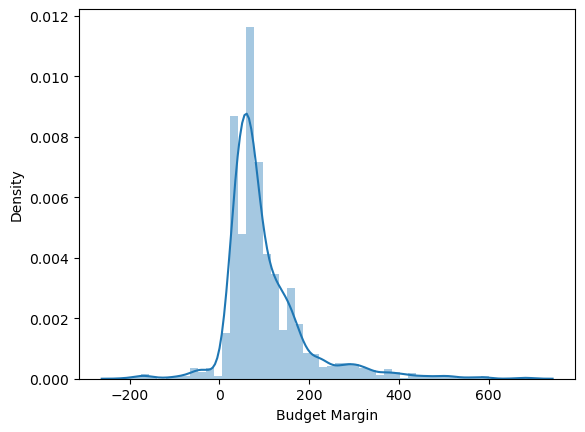

In [23]:
display(data['Budget Margin'].min())
display(data['Budget Margin'].max())
sns.distplot(data['Budget Margin'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Budget Margin'>

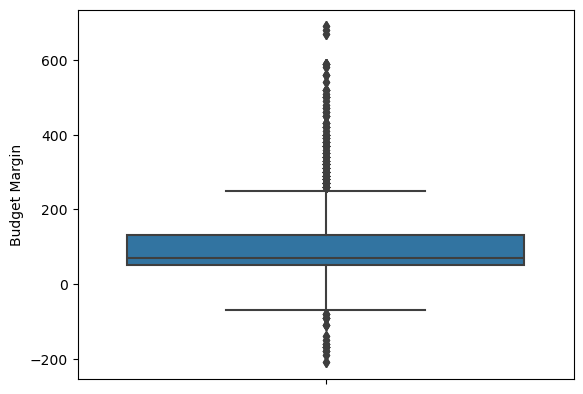

In [24]:
sns.boxplot(data=data, y="Budget Margin")

In [25]:
# More than just a few relevant outliers, below 0, that could be dropped without further insights 

-3534.0

8252.0

C:\Users\49174\AppData\Local\Temp\ipykernel_5772\441790542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inventory'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


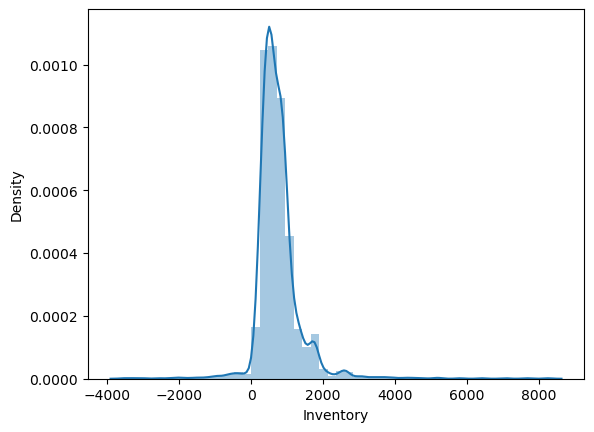

In [26]:
display(data['Inventory'].min())
display(data['Inventory'].max())
sns.distplot(data['Inventory'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Inventory'>

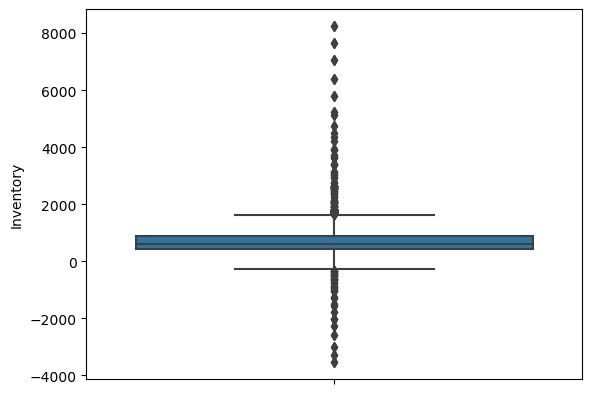

In [27]:
sns.boxplot(data=data, y="Inventory")

In [28]:
# More than just a few relevant outliers, below 0, that could be dropped without further insights 

-302.0

613.0

C:\Users\49174\AppData\Local\Temp\ipykernel_5772\939415652.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Margin'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


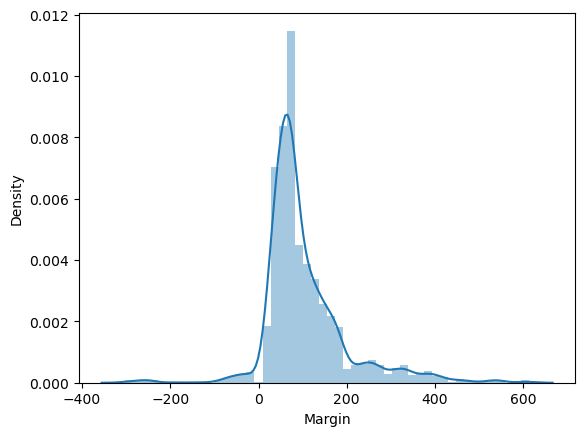

In [29]:
display(data['Margin'].min())
display(data['Margin'].max())
sns.distplot(data['Margin'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Margin'>

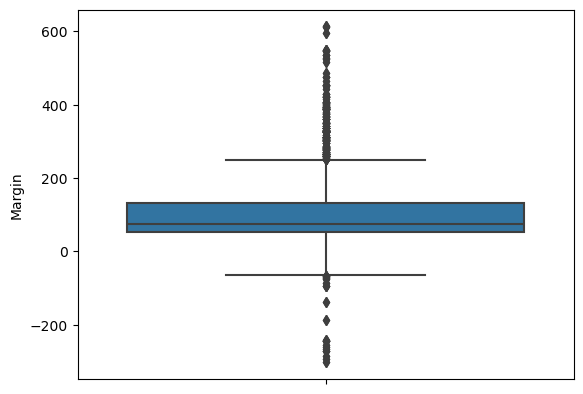

In [30]:
sns.boxplot(data=data, y="Margin")

In [31]:
# More than just a few relevant outliers, below 0, that could be dropped without further insights 
# Their might be other explanations
    # High margins might indicate, that the costs are higher than the profit
    # Inventory value negative because.......

In [32]:
# https://datatofish.com/line-chart-python-matplotlib/
# https://stackoverflow.com/questions/16992038/how-to-place-inline-labels-in-a-line-plot

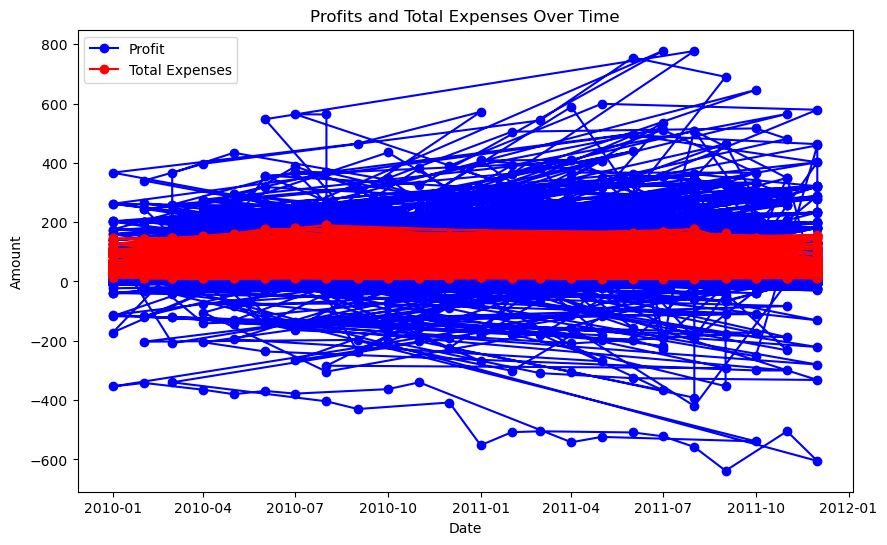

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Profit'], marker='o', linestyle='-', color='b', label='Profit')
plt.plot(data['Date'], data['Total Expenses'], marker='o', linestyle='-', color='r', label='Total Expenses')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Profits and Total Expenses Over Time')
plt.legend()

plt.show()

In [34]:
# Total Expenses are often higher than the profit

In [35]:
# Therefore my 

In [36]:
# I decide not to drop any negative values, since their seem to be plausible explanations for them

## Summarysing the first insights about the main dataset after preliminary analysis 

* The main dataset has 4248 rows and therefore contains data about 4248 different markets.
* The main dataset has 20 columns with data related to the markets, their sales.

* From looking at the preliminary analysis we can see:
    * States: The dataset contains data of 20 different US states.
    * Market: Four unique market categories: East, West, South, Central
    * Market Size: 
Two market size categories: Small Market, Major Market
    * Inventory (min): The minimum value for "Inventory" is listed as -3534. This suggests a negative inventory, which is unusual in most contexts. Inventory is typically a non-negative quantity, so a negative value may be an error or need clarification.
    * Budget Margin (min): The minimum value for "Budget Margin" is listed as -210. This seems unusual for a margin, which is typically a percentage. Margins are usually expressed as positive values or percentages, so a negative value here may be an error or require further explanation.
    * Margin (min): The minimum value for "Margin" is listed as -302. Negative margins are generally uncommon and may indicate an error or require further investigation.
      mns.



* Date: numeric column containing dates of the sales. I will need to transform to datetime, split in multiple columns.

# Data cleaning

In [37]:
# Splitting the main dataset into numerical and categorical values to treat numerical and categorical values separateley
categorical_main = data.select_dtypes(include=object)
numerical_main = data.select_dtypes(include=np.number)

In [38]:
print(categorical_main.columns)
print(len(categorical_main.columns))

Index(['State', 'Market', 'Market Size', 'Date', 'Product Type', 'Product',
       'Type'],
      dtype='object')
7


In [39]:
numerical_main.columns
print(len(numerical_main.columns))

18


# Correlations of numerical values

In [40]:
# Look at the correlations of numerical values
correlations = numerical_main.corr()
correlations

Area Code    Profit        Margin     Sales          COGS  \
Area Code        1.000000  0.013979  2.927834e-02  0.055220  8.047071e-02   
Profit           0.013979  1.000000  9.206041e-01  0.797331  4.648382e-01   
Margin           0.029278  0.920604  1.000000e+00  0.938809  6.787967e-01   
Sales            0.055220  0.797331  9.388095e-01  1.000000  8.866512e-01   
COGS             0.080471  0.464838  6.787967e-01  0.886651  1.000000e+00   
Total Expenses   0.044552  0.199976  5.212543e-01  0.689350  7.825338e-01   
Marketing        0.051232  0.225465  5.319466e-01  0.710515  8.182707e-01   
Inventory        0.067998 -0.091545  6.125885e-02  0.325934  6.210864e-01   
Budget Profit    0.011994  0.937606  9.228119e-01  0.815435  5.149673e-01   
Budget COGS      0.063720  0.479862  6.805488e-01  0.862882  9.477621e-01   
Budget Margin    0.022871  0.876844  9.634598e-01  0.920757  6.885869e-01   
Budget Sales     0.042572  0.758830  9.019808e-01  0.956538  8.499008e-01   
ProductId        0.024297 -0.058693 -7.959521e-02 -0.048077  2.142304e-03   
Day                   NaN       NaN           NaN       NaN           NaN   
Week            -0.013396 -0.000787 -6.415422e-03  0.002412 -4.951048e-03   
Month            0.013481  0.008031  1.276869e-02  0.010715  1.463609e-02   
Year            -0.011354  0.110857 -9.657632e-14  0.027250 -1.320827e-13   
Weekday         -0.031698  0.017156  7.434027e-03  0.014529  1.055080e-02   

                Total Expenses     Marketing     Inventory  Budget Profit  \
Area Code             0.044552  5.123189e-02  6.799773e-02   1.199399e-02   
Profit                0.199976  2.254650e-01 -9.154483e-02   9.376062e-01   
Margin                0.521254  5.319466e-01  6.125885e-02   9.228119e-01   
Sales                 0.689350  7.105149e-01  3.259335e-01   8.154348e-01   
COGS                  0.782534  8.182707e-01  6.210864e-01   5.149673e-01   
Total Expenses        1.000000  9.661667e-01  4.337078e-01   2.558112e-01   
Marketing             0.966167  1.000000e+00  4.977636e-01   2.793152e-01   
Inventory             0.433708  4.977636e-01  1.000000e+00  -1.927503e-02   
Budget Profit         0.255811  2.793152e-01 -1.927503e-02   1.000000e+00   
Budget COGS           0.744259  7.737093e-01  5.798760e-01   5.791765e-01   
Budget Margin         0.530776  5.430390e-01  1.193734e-01   9.496366e-01   
Budget Sales          0.661217  6.819459e-01  3.322164e-01   8.482855e-01   
ProductId            -0.073369 -4.222699e-02  6.745690e-02  -1.477584e-01   
Day                        NaN           NaN           NaN            NaN   
Week                  0.006526 -4.631586e-03  5.791213e-02  -1.045934e-02   
Month                 0.006231  1.377227e-02  9.603937e-02   7.596332e-03   
Year                 -0.016970 -1.375801e-13 -1.441474e-13  -6.023983e-14   
Weekday               0.008738  8.409053e-03  3.975407e-03   2.576700e-02   

                 Budget COGS  Budget Margin  Budget Sales     ProductId  Day  \
Area Code       6.371986e-02   2.287113e-02  4.257203e-02  2.429694e-02  NaN   
Profit          4.798618e-01   8.768442e-01  7.588298e-01 -5.869339e-02  NaN   
Margin          6.805488e-01   9.634598e-01  9.019808e-01 -7.959521e-02  NaN   
Sales           8.628820e-01   9.207573e-01  9.565376e-01 -4.807745e-02  NaN   
COGS            9.477621e-01   6.885869e-01  8.499008e-01  2.142304e-03  NaN   
Total Expenses  7.442592e-01   5.307757e-01  6.612171e-01 -7.336890e-02  NaN   
Marketing       7.737093e-01   5.430390e-01  6.819459e-01 -4.222699e-02  NaN   
Inventory       5.798760e-01   1.193734e-01  3.322164e-01  6.745690e-02  NaN   
Budget Profit   5.791765e-01   9.496366e-01  8.482855e-01 -1.477584e-01  NaN   
Budget COGS     1.000000e+00   7.504222e-01  9.115985e-01 -1.566830e-01  NaN   
Budget Margin   7.504222e-01   1.000000e+00  9.557918e-01 -1.752972e-01  NaN   
Budget Sales    9.115985e-01   9.557918e-01  1.000000e+00 -1.787300e-01  NaN   
ProductId      -1.566830e-01  -1.752972e-01 -1.7

In [41]:
# We have to pay attention, that our target Sales is also included in the numerical columns, whose correlations are displayed

In [42]:
# We have significant correlations between features, higher than 0.95
# This features provide us the same information, to the biggest degree. 
# This means we have to drop one of the features which have such a high correlation
# This concerns the combinations:
    # Profit; Budget Profit: 0.937606
    # Margin; Budget Margin: 0.963460

# Also very high calculation: Profit; Margin: 0.920604

# Budget sales is strongly related to my sales (target) and should probably also be dropped to avoid overfitting
# Sales and Budget Sales: 0.956538 

C:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


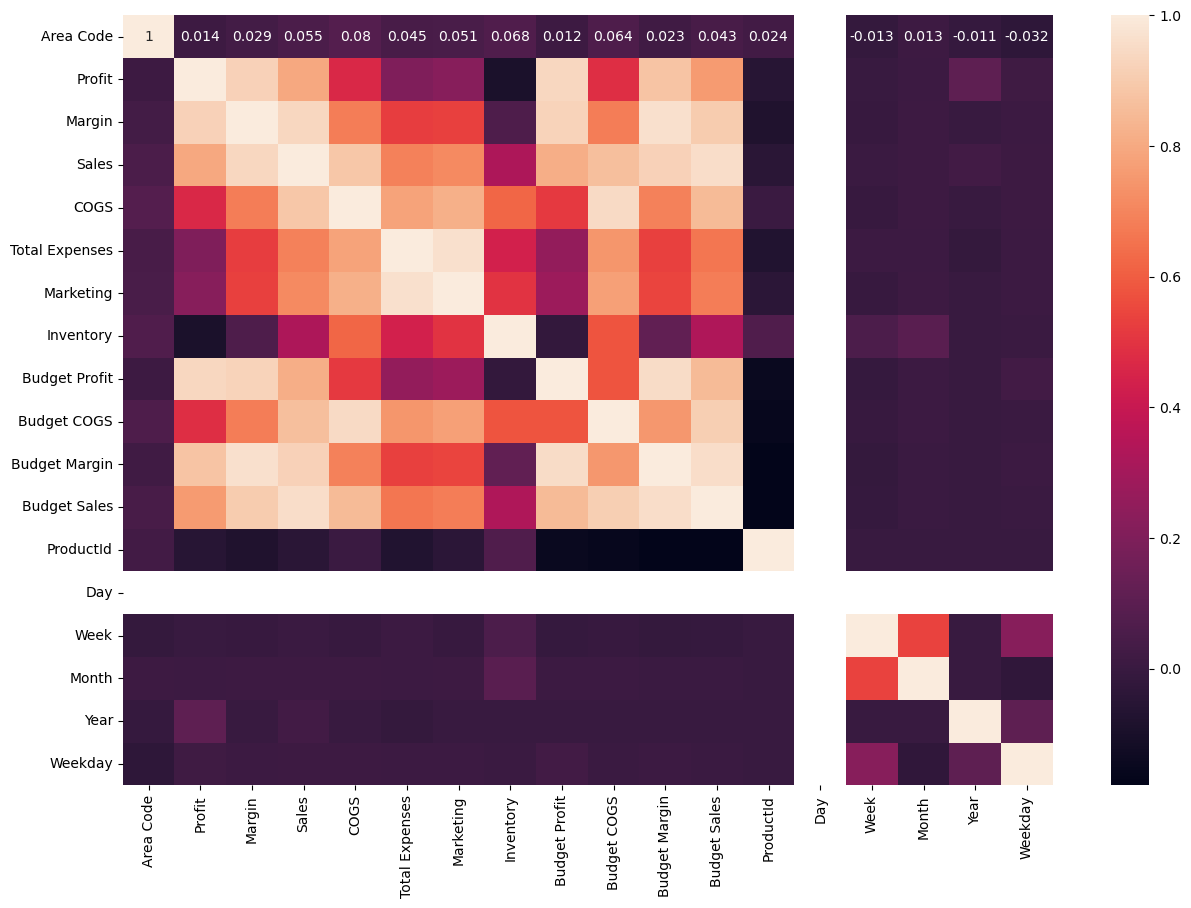

In [43]:
# Heatmap
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical_main.corr(), annot=True)
plt.show()

In [44]:
# Columns to drop when modeling, dropp them before you start to build the model

columns_to_drop_main_numerical = ['Budget Profit', 'Budget Margin', 'Budget Sales']

# Correlations of categorical values

There might be some columns that seem to be redundant, check their values to be sure.

In [45]:
# Change dataframe name to categorical_main

In [46]:
categorical_main.columns

Index(['State', 'Market', 'Market Size', 'Date', 'Product Type', 'Product',
       'Type'],
      dtype='object')

In [47]:
# H0 there is no association or between Product Type and Product, they are independent.

In [48]:
# Maybe Product Type and Product
data_crosstab_1 = pd.crosstab(categorical_main['Product Type'], categorical_main['Product'], margins=False)
display(data_crosstab_1)

Product       Amaretto  Caffe Latte  Caffe Mocha  Chamomile  Columbian  \
Product Type                                                             
Coffee             192            0            0          0        480   
Espresso             0          216          480          0          0   
Herbal Tea           0            0            0        384          0   
Tea                  0            0            0          0          0   

Product       Darjeeling  Decaf Espresso  Decaf Irish Cream  Earl Grey  \
Product Type                                                             
Coffee                 0               0                384          0   
Espresso               0             408                  0          0   
Herbal Tea             0               0                  0          0   
Tea                  384               0                  0        288   

Product       Green Tea  Lemon  Mint  Regular Espresso  
Product Type                                            
Coffee                0      0     0                 0  
Espresso              0      0     0                72  
Herbal Tea            0    480   192                 0  
Tea                 288      0     0                 0

In [49]:
import scipy.stats as st
st.chi2_contingency(np.array(data_crosstab_1))

Chi2ContingencyResult(statistic=12744.0, pvalue=0.0, dof=36, expected_freq=array([[ 47.72881356,  53.69491525, 119.3220339 ,  95.45762712,
        119.3220339 ,  95.45762712, 101.42372881,  95.45762712,
         71.59322034,  71.59322034, 119.3220339 ,  47.72881356,
         17.89830508],
       [ 53.15254237,  59.79661017, 132.88135593, 106.30508475,
        132.88135593, 106.30508475, 112.94915254, 106.30508475,
         79.72881356,  79.72881356, 132.88135593,  53.15254237,
         19.93220339],
       [ 47.72881356,  53.69491525, 119.3220339 ,  95.45762712,
        119.3220339 ,  95.45762712, 101.42372881,  95.45762712,
         71.59322034,  71.59322034, 119.3220339 ,  47.72881356,
         17.89830508],
       [ 43.38983051,  48.81355932, 108.47457627,  86.77966102,
        108.47457627,  86.77966102,  92.20338983,  86.77966102,
         65.08474576,  65.08474576, 108.47457627,  43.38983051,
         16.27118644]]))

In [50]:
st.chi2_contingency(data_crosstab_1)[1]

0.0

In [51]:
# p-value of 0.0 suggests that there is a significant association between the 'Product Type' and 'Product' variables 
# p is low, strong evidence to reject the null hypothesis, implying a significant association between the categorical variables 

In [52]:
# One of the features should be dropped for medelling

In [53]:
# Maybe Product Type and Type
data_crosstab_2 = pd.crosstab(categorical_main['Product'], categorical_main['Type'], margins=False)
display(data_crosstab_2)

Type               Decaf  Regular
Product                          
Amaretto               0      192
Caffe Latte            0      216
Caffe Mocha            0      480
Chamomile            384        0
Columbian              0      480
Darjeeling             0      384
Decaf Espresso       408        0
Decaf Irish Cream    384        0
Earl Grey              0      288
Green Tea              0      288
Lemon                480        0
Mint                 192        0
Regular Espresso       0       72

In [54]:
st.chi2_contingency(np.array(data_crosstab_2))

Chi2ContingencyResult(statistic=4247.999999999999, pvalue=0.0, dof=12, expected_freq=array([[ 83.52542373, 108.47457627],
       [ 93.96610169, 122.03389831],
       [208.81355932, 271.18644068],
       [167.05084746, 216.94915254],
       [208.81355932, 271.18644068],
       [167.05084746, 216.94915254],
       [177.49152542, 230.50847458],
       [167.05084746, 216.94915254],
       [125.28813559, 162.71186441],
       [125.28813559, 162.71186441],
       [208.81355932, 271.18644068],
       [ 83.52542373, 108.47457627],
       [ 31.3220339 ,  40.6779661 ]]))

In [55]:
st.chi2_contingency(data_crosstab_2)[1]

0.0

In [56]:
# p-value of 0.0 suggests that there is a significant association between the 'Product' and 'Type' variables 
# p is low, strong evidence to reject the null hypothesis, implying a significant association between the categorical variables 

In [57]:
# One of the features should be dropped for modelling 

In [58]:
# Maybe Market and Market Size
data_crosstab_3 = pd.crosstab(categorical_main['Market'], categorical_main['Market Size'], margins=False)
display(data_crosstab_1)

Product       Amaretto  Caffe Latte  Caffe Mocha  Chamomile  Columbian  \
Product Type                                                             
Coffee             192            0            0          0        480   
Espresso             0          216          480          0          0   
Herbal Tea           0            0            0        384          0   
Tea                  0            0            0          0          0   

Product       Darjeeling  Decaf Espresso  Decaf Irish Cream  Earl Grey  \
Product Type                                                             
Coffee                 0               0                384          0   
Espresso               0             408                  0          0   
Herbal Tea             0               0                  0          0   
Tea                  384               0                  0        288   

Product       Green Tea  Lemon  Mint  Regular Espresso  
Product Type                                            
Coffee                0      0     0                 0  
Espresso              0      0     0                72  
Herbal Tea            0    480   192                 0  
Tea                 288      0     0                 0

In [59]:
st.chi2_contingency(np.array(data_crosstab_3))

Chi2ContingencyResult(statistic=515.1533643472255, pvalue=2.4809453334440276e-111, dof=3, expected_freq=array([[539.11864407, 804.88135593],
       [356.20338983, 531.79661017],
       [269.55932203, 402.44067797],
       [539.11864407, 804.88135593]]))

In [60]:
st.chi2_contingency(data_crosstab_3)[1]

2.4809453334440276e-111

In [61]:
# p-value is close to 0, suggests that there is a significant association between Market and Market Size

In [62]:
# Columns to drop when modeling, dropp them before you start to build the model

columns_to_drop_main_categorical = ['Product Type', 'Type', 'Market Size']

# Getting the Latitude and Longitude vlaues for the API request

In [63]:
print(data['State'].unique())

['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']


In [64]:
print(data['Area Code'].unique())

[203 206 209 210 212 213 214 216 217 224 225 234 239 253 254 262 281 303
 305 309 310 312 314 315 318 319 321 323 325 330 337 339 347 351 352 360
 361 386 405 407 408 409 413 414 415 417 419 425 430 432 435 440 469 475
 503 504 505 508 509 510 512 513 515 516 518 530 541 559 561 562 563 567
 573 580 585 603 607 608 614 617 618 619 626 630 631 636 641 646 650 660
 661 682 702 707 708 712 713 714 715 716 718 719 720 727 740 754 760 772
 773 774 775 781 786 801 805 806 813 815 816 817 818 830 831 832 845 847
 850 857 858 860 863 903 904 909 914 915 916 917 918 920 925 936 937 940
 941 949 951 954 956 959 970 971 972 978 979 985]


In [65]:
# Create a list of area codes
area_codes = [data['Area Code'].unique()]
area_codes

[array([203, 206, 209, 210, 212, 213, 214, 216, 217, 224, 225, 234, 239,
        253, 254, 262, 281, 303, 305, 309, 310, 312, 314, 315, 318, 319,
        321, 323, 325, 330, 337, 339, 347, 351, 352, 360, 361, 386, 405,
        407, 408, 409, 413, 414, 415, 417, 419, 425, 430, 432, 435, 440,
        469, 475, 503, 504, 505, 508, 509, 510, 512, 513, 515, 516, 518,
        530, 541, 559, 561, 562, 563, 567, 573, 580, 585, 603, 607, 608,
        614, 617, 618, 619, 626, 630, 631, 636, 641, 646, 650, 660, 661,
        682, 702, 707, 708, 712, 713, 714, 715, 716, 718, 719, 720, 727,
        740, 754, 760, 772, 773, 774, 775, 781, 786, 801, 805, 806, 813,
        815, 816, 817, 818, 830, 831, 832, 845, 847, 850, 857, 858, 860,
        863, 903, 904, 909, 914, 915, 916, 917, 918, 920, 925, 936, 937,
        940, 941, 949, 951, 954, 956, 959, 970, 971, 972, 978, 979, 985],
       dtype=int64)]

In [66]:
# Create a list of area codes containing only string values 
area_codes_as_strings = []
for area_code in area_codes:
    area_codes_as_strings.append(str(area_code))

In [67]:
# Get the respective Latitude and Longitude for all the area codes in the list of strings area_codes_as_strings
    # Create add Latitude and Longitude to the dataframe in order to be able to concatenate the dataframe with my weather data.

In [68]:
import requests

In [69]:
# Use the Google Geocoding API to get the Latitude and Longitude for each area code in the list area_codes_as_strings
for area_code in area_codes_as_strings:
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?address=" + area_code
    response = requests.get(base_url)
    data_La_Lo = response.json()

In [70]:
data_La_Lo

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}

In [71]:
# I do not want to pay for this key so I need a different approach

In [72]:
data['area_code_and_state'] = data['Area Code'].astype(str) + ' ' + data['State']

In [73]:
data.head()

Area Code        State Market   Market Size  Profit  Margin  Sales   COGS  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   
1        203  Connecticut   East  Small Market    75.0   135.0  225.0   90.0   
2        203  Connecticut   East  Small Market   122.0   195.0  325.0  130.0   
3        203  Connecticut   East  Small Market   105.0   174.0  289.0  115.0   
4        203  Connecticut   East  Small Market   104.0   135.0  223.0   90.0   

   Total Expenses  Marketing  ...                 Date  Product Type  \
0            69.0       38.0  ...  2010-04-01 00:00:00        Coffee   
1            60.0       29.0  ...  2010-07-01 00:00:00        Coffee   
2            73.0       42.0  ...  2010-11-01 00:00:00        Coffee   
3            69.0       37.0  ...  2010-12-01 00:00:00        Coffee   
4            56.0       29.0  ...  2011-07-01 00:00:00        Coffee   

     Product     Type  Day  Week Month  Year Weekday area_code_and_state  
0  Columbian  Regular    1    13     4  2010       3     203 Connecticut  
1  Columbian  Regular    1    26     7  2010       3     203 Connecticut  
2  Columbian  Regular    1    44    11  2010       0     203 Connecticut  
3  Columbian  Regular    1    48    12  2010       2     203 Connecticut  
4  Columbian  Regular    1    26     7  2011       4     203 Connecticut  

[5 rows x 26 columns]

In [74]:
# Create a new column area_code_and_state, reason is that I want to use OpenCageGeocode which alows me only 2500 requests per day
# I run into the error max request or something like that
# I will try to search for my unique values only to stay under this request limitation
# I still want to use Area Code and state for the query to avoid doubles of area codes somewhere else which would give me wrong coordinates

# Print the unique values in the new column
print(data['area_code_and_state'].unique())

['203 Connecticut' '206 Washington' '209 California' '210 Texas'
 '212 New York' '213 California' '214 Texas' '216 Ohio' '217 Illinois'
 '224 Illinois' '225 Louisiana' '234 Ohio' '239 Florida' '253 Washington'
 '254 Texas' '262 Wisconsin' '281 Texas' '303 Colorado' '305 Florida'
 '309 Illinois' '310 California' '312 Illinois' '314 Missouri'
 '315 New York' '318 Louisiana' '319 Iowa' '321 Florida' '323 California'
 '325 Texas' '330 Ohio' '337 Louisiana' '339 Massachusetts' '347 New York'
 '351 Massachusetts' '352 Florida' '360 Washington' '361 Texas'
 '386 Florida' '405 Oklahoma' '407 Florida' '408 California' '409 Texas'
 '413 Massachusetts' '414 Wisconsin' '415 California' '417 Missouri'
 '419 Ohio' '425 Washington' '430 Texas' '432 Texas' '435 Utah' '440 Ohio'
 '469 Texas' '475 Connecticut' '503 Oregon' '504 Louisiana'
 '505 New Mexico' '508 Massachusetts' '509 Washington' '510 California'
 '512 Texas' '513 Ohio' '515 Iowa' '516 New York' '518 New York'
 '530 California' '541 Oregon'

In [75]:
# Use getpass to securely input the API key without displaying it

import requests
import getpass
api_key = getpass.getpass()

 ········


In [ ]:
# https://opencagedata.com/api
    # Forward geocoding
    # https://api.opencagedata.com/geocode/v1/json?q=URI-ENCODED-PLACENAME&key=YOUR-API-KEY

In [76]:
import requests
import json
from pandas import json_normalize
import getpass

# Initialize an empty list
locations = []

# Iterate over unique values in the 'area_code_and_state' column
# The URL pattern I got form the site https://opencagedata.com/api like mentioned above
# I use my query as place name and my defined key
# Use the Code from the lesson 6.04-2
    # res = requests.get()
    # out = res.json()
# 200 OK (zero or more results will be returned) https://opencagedata.com/api

for query in data['area_code_and_state'].unique():
    # Make a request to OpenCage Geocoding API
    url = f'https://api.opencagedata.com/geocode/v1/json?q={query}&key={api_key}'
    response = requests.get(url)

    # Checks for status 200 = OK (zero or more results will be returned)
    # When Coordinates can be found attach them to my list, if not add Null values, to avoid errors.
    if response.status_code == 200:
        result = response.json()
        locations.append(result)
    else:
        locations.append(None)


In [77]:
locations

[{'documentation': 'https://opencagedata.com/api',
  'licenses': [{'name': 'see attribution guide',
    'url': 'https://opencagedata.com/credits'}],
  'rate': {'limit': 2500, 'remaining': 2027, 'reset': 1702512000},
  'results': [{'annotations': {'DMS': {'lat': "41° 49' 7.60980'' N",
      'lng': "72° 18' 21.51252'' W"},
     'FIPS': {'state': '09'},
     'MGRS': '18TYM2375333164',
     'Maidenhead': 'FN31ut36gm',
     'Mercator': {'x': -8049064.396, 'y': 5105374.065},
     'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?node=9459296000#map=17/41.81878/-72.30598',
      'note_url': 'https://www.openstreetmap.org/note/new#map=17/41.81878/-72.30598&layers=N',
      'url': 'https://www.openstreetmap.org/?mlat=41.81878&mlon=-72.30598#map=17/41.81878/-72.30598'},
     'UN_M49': {'regions': {'AMERICAS': '019',
       'NORTHERN_AMERICA': '021',
       'US': '840',
       'WORLD': '001'},
      'statistical_groupings': ['MEDC']},
     'callingcode': 1,
     'currency': {'alternate_symb

In [78]:
# Display the JSON response
print(json.dumps(locations, indent=6))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [79]:
# Lesson 6.04
# from pandas import json_normalize
# flattened_data = json_normalize(data)

In [80]:
from pandas import json_normalize

flattened_df = json_normalize(locations[-1]['results'])

# Display the flattened DataFrame
print(flattened_df)

   confidence                                formatted   annotations.DMS.lat  \
0          10  Louisiana 985, 902 0078 Pudahuel, Chile  33° 26' 27.79368'' S   
1           1      Louisiana, United States of America    31° 0' 1.69200'' N   

    annotations.DMS.lng annotations.MGRS annotations.Maidenhead  \
0  70° 44' 45.14604'' W  19HCC3771498453             FF46pn04ld   
1    92° 0' 1.44000'' W  15RWQ9542930082             EM31xa90wc   

   annotations.Mercator.x  annotations.Mercator.y  \
0           -7.875395e+06            -3930448.131   
1           -1.024144e+07             3610805.923   

                            annotations.OSM.edit_url  \
0  https://www.openstreetmap.org/edit?node=126402...   
1                                                NaN   

                            annotations.OSM.note_url  ... components.postcode  \
0  https://www.openstreetmap.org/note/new#map=16/...  ...            902 0078   
1  https://www.openstreetmap.org/note/new#map=16/...  ...         

In [81]:
flattened_df['geometry.lat'] = flattened_df['geometry.lat'].astype(float)
flattened_df['geometry.lng'] = flattened_df['geometry.lng'].astype(float)

# Display the DataFrame with flattened latitude and longitude
print(flattened_df[['formatted', 'geometry.lat', 'geometry.lng']])

                                 formatted  geometry.lat  geometry.lng
0  Louisiana 985, 902 0078 Pudahuel, Chile    -33.441054    -70.745874
1      Louisiana, United States of America     31.000470    -92.000400


In [82]:
display(flattened_df)

confidence                                formatted   annotations.DMS.lat  \
0          10  Louisiana 985, 902 0078 Pudahuel, Chile  33° 26' 27.79368'' S   
1           1      Louisiana, United States of America    31° 0' 1.69200'' N   

    annotations.DMS.lng annotations.MGRS annotations.Maidenhead  \
0  70° 44' 45.14604'' W  19HCC3771498453             FF46pn04ld   
1    92° 0' 1.44000'' W  15RWQ9542930082             EM31xa90wc   

   annotations.Mercator.x  annotations.Mercator.y  \
0           -7.875395e+06            -3930448.131   
1           -1.024144e+07             3610805.923   

                            annotations.OSM.edit_url  \
0  https://www.openstreetmap.org/edit?node=126402...   
1                                                NaN   

                            annotations.OSM.note_url  ... components.postcode  \
0  https://www.openstreetmap.org/note/new#map=16/...  ...            902 0078   
1  https://www.openstreetmap.org/note/new#map=16/...  ...                 NaN   

  components.road              components.state components.suburb  \
0       Louisiana  Santiago Metropolitan Region          Pudahuel   
1             NaN                     Louisiana               NaN   

  geometry.lat geometry.lng annotations.FIPS.state  \
0   -33.441054   -70.745874                    NaN   
1    31.000470   -92.000400                     22   

   annotations.UN_M49.regions.NORTHERN_AMERICA annotations.UN_M49.regions.US  \
0                                          NaN                           NaN   
1                                          021                           840   

  components.state_code  
0                   NaN  
1                    LA  

[2 rows x 76 columns]

In [83]:
flattened_df.columns

Index(['confidence', 'formatted', 'annotations.DMS.lat', 'annotations.DMS.lng',
       'annotations.MGRS', 'annotations.Maidenhead', 'annotations.Mercator.x',
       'annotations.Mercator.y', 'annotations.OSM.edit_url',
       'annotations.OSM.note_url', 'annotations.OSM.url',
       'annotations.UN_M49.regions.AMERICAS', 'annotations.UN_M49.regions.CL',
       'annotations.UN_M49.regions.LATIN_AMERICA',
       'annotations.UN_M49.regions.SOUTH_AMERICA',
       'annotations.UN_M49.regions.WORLD',
       'annotations.UN_M49.statistical_groupings', 'annotations.callingcode',
       'annotations.currency.alternate_symbols',
       'annotations.currency.decimal_mark',
       'annotations.currency.disambiguate_symbol',
       'annotations.currency.html_entity', 'annotations.currency.iso_code',
       'annotations.currency.iso_numeric', 'annotations.currency.name',
       'annotations.currency.smallest_denomination',
       'annotations.currency.subunit', 'annotations.currency.subunit_to_uni

In [84]:
flattened_df['geometry.lat'][1]

31.00047

In [85]:
flattened_df['geometry.lng'][1]

-92.0004

In [86]:
# To be sure to not have any errors I will proceed with Code specific to this Website
    # I will use the insights gathered from the json process above 

In [87]:
# https://stackoverflow.com/questions/60370821/find-latitude-and-longitude-using-city-and-state-columns
# https://github.com/ravisorg/Area-Code-Geolocation-Database

The pattern I can use for my request

from opencage.geocoder import OpenCageGeocode
key = 'my_key'  # get api key from : https://opencagedata.com
geocoder = OpenCageGeocode(key)
list_lat = []   # create empty lists

list_long = []
for index, row in train.iterrows(): # iterate over rows in dataframe



City = row['CITY']
State = row['STATE']       
query = str(City)+','+str(State)

results = geocoder.geocode(query)   
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']

list_lat.append(lat)
list_long.append(long)

# create new columns from lists    

train['lat'] = list_lat   

test['lon'] = list_long

In [88]:
#pip install opencage

In [89]:
from opencage.geocoder import OpenCageGeocode

In [90]:
geocoder = OpenCageGeocode(api_key)

In [91]:
# create empty lists
list_lat = []  
list_long = []

# Iterate over unique values in the 'area_code_and_state' column
for query in data['area_code_and_state'].unique():
    results = geocoder.geocode(query)

    if results and len(results) > 0:
        lat = results[0]['geometry']['lat']
        lon = results[0]['geometry']['lng']
        list_lat.append(lat)
        list_long.append(lon)
    else:
        list_lat.append(None)
        list_long.append(None)



In [92]:
print(list_lat)
print(list_long)

[41.8187805, 48.4544055, 33.9458237, 31.487652, 41.0188704, 32.822116, 27.5366011, 41.135497, 41.9109119, 41.7046794, 30.0055228, 39.1382172, 28.9961477, 46.6593782, 30.4730105, 43.0390301, 32.7276193, 39.7105221, 30.3596255, 42.0195332, 37.7849516, 41.1139402, 39.4290117, 40.7470064, 29.9683718, 41.5864918, 26.0346815, 34.4048154, 32.7833712, 39.1528069, 32.6864565, 42.3234884, 42.155503, 42.3383287, 28.9117072, 47.3992555, 32.4994921, 30.4347762, 36.1264242, 30.0377525, 33.944787, 29.4384599, 42.6952843, 43.0555373, 33.944059, 38.5766721, 41.3713651, 46.0449349, 29.4362314, 32.1113342, 40.7196493, 38.8515608, 33.2331157, 41.7424548, 45.5266342, 30.9717867, 35.1721291, 42.2576187, 47.0372494, 37.7907978, 30.3998293, 40.6468105, 42.7494978, 40.7515838, 40.7511534, 33.8711033, 44.0654816, 33.6765938, 26.1277804, 33.6765938, 41.6272288, 39.1027277, 38.5716045, 35.5377266, 46.1209422, 33.7157856, 40.8333245, 43.0029556, 41.3997404, 42.3109658, 41.7618084, 32.812912, 34.0482839, 41.8920118

In [93]:
# There seems to be an issue with Some of the Longitude and Latitude values
    # http://dhmontgomery.com/2018/02/population-latitude/
    # 25th parallel (the southern tip of Florida) to the 49th parallel (the northern borders of Washington, Montana, North Dakota and Minnesota — minus the Northwest Angle), 
    # and from the 67th meridian (the tip of Maine) to the 125th meridian (just past Washington’s Olympic Peninsula).
    

In [94]:
# At least one value is too small
min_value = min(list_lat)
max_value = max(list_lat)
print(min_value)
print(max_value)

-33.4410538
48.4544055


In [95]:
# This values are all within the longitude range 
min_value_long = min(list_long)
max_value_long = max(list_long)
print(min_value_long)
print(max_value_long)

-123.1124979
-64.2284098


In [96]:
# I will have to clean the wrong values at a later step

In [97]:
area_code_and_state = data['area_code_and_state'].unique()

In [98]:
len(area_code_and_state)

156

In [99]:
# Create a DataFrame
df = pd.DataFrame({
    'area_code_and_state': area_code_and_state,
    'latitude': list_lat,
    'longitude': list_long
})

# Display the DataFrame
display(df)

area_code_and_state   latitude   longitude
0       203 Connecticut  41.818781  -72.305976
1        206 Washington  48.454406 -122.610664
2        209 California  33.945824 -118.413871
3             210 Texas  31.487652  -98.520487
4          212 New York  41.018870  -72.308525
..                  ...        ...         ...
151          971 Oregon  42.045676 -123.112498
152           972 Texas  29.583579  -98.928001
153   978 Massachusetts  42.477337  -70.891471
154           979 Texas  30.263268  -97.696296
155       985 Louisiana -33.441054  -70.745874

[156 rows x 3 columns]

In [100]:
data.head()
data.shape

(4248, 26)

In [101]:
# (how='left'), meaning that all the rows from the original dataframe data will be included in the merged dataframe, and only matching rows from the second dataframe df will be added.
# This should work, since the df column area_code_and_state contains only unique values from the same column in dataframe data

merged_df = pd.merge(data, df, on='area_code_and_state', how='left')

In [102]:
display(merged_df)

Area Code        State Market   Market Size  Profit  Margin  Sales  \
0           203  Connecticut   East  Small Market   107.0   176.0  292.0   
1           203  Connecticut   East  Small Market    75.0   135.0  225.0   
2           203  Connecticut   East  Small Market   122.0   195.0  325.0   
3           203  Connecticut   East  Small Market   105.0   174.0  289.0   
4           203  Connecticut   East  Small Market   104.0   135.0  223.0   
...         ...          ...    ...           ...     ...     ...    ...   
4243        985    Louisiana  South  Small Market    -6.0    66.0  113.0   
4244        985    Louisiana  South  Small Market    -7.0    61.0  105.0   
4245        985    Louisiana  South  Small Market    -3.0    76.0  131.0   
4246        985    Louisiana  South  Small Market     1.0    87.0  160.0   
4247        985    Louisiana  South  Small Market     4.0    90.0  153.0   

       COGS  Total Expenses  Marketing  ...      Product     Type  Day  Week  \
0     116.0            69.0       38.0  ...    Columbian  Regular    1    13   
1      90.0            60.0       29.0  ...    Columbian  Regular    1    26   
2     130.0            73.0       42.0  ...    Columbian  Regular    1    44   
3     115.0            69.0       37.0  ...    Columbian  Regular    1    48   
4      90.0            56.0       29.0  ...    Columbian  Regular    1    26   
...     ...             ...        ...  ...          ...      ...  ...   ...   
4243   47.0            72.0       42.0  ...  Caffe Latte  Regular    1    26   
4244   44.0            68.0       39.0  ...  Caffe Latte  Regular    1    30   
4245   55.0            79.0       49.0  ...  Caffe Latte  Regular    1    48   
4246   63.0            86.0       57.0  ...  Caffe Latte  Regular    1    13   
4247   64.0            81.0       58.0  ...  Caffe Latte  Regular    1    17   

      Month  Year Weekday area_code_and_state   latitude  longitude  
0         4  2010       3     203 Connecticut  41.818781 -72.305976  
1         7  2010       3     203 Connecticut  41.818781 -72.305976  
2        11  2010       0     203 Connecticut  41.818781 -72.305976  
3        12  2010       2     203 Connecticut  41.818781 -72.305976  
4         7  2011       4     203 Connecticut  41.818781 -72.305976  
...     ...   ...     ...                 ...        ...        ...  
4243      7  2010       3       985 Louisiana -33.441054 -70.745874  
4244      8  2010       6       985 Louisiana -33.441054 -70.745874  
4245     12  2010       2       985 Louisiana -33.441054 -70.745874  
4246      4  2011       4       985 Louisiana -33.441054 -70.745874  
4247      5  2011       6       985 Louisiana -33.441054 -70.745874  

[4248 rows x 28 columns]

In [103]:
merged_df.isna().sum()

Area Code              0
State                  0
Market                 0
Market Size            0
Profit                 0
Margin                 0
Sales                  0
COGS                   0
Total Expenses         0
Marketing              0
Inventory              0
Budget Profit          0
Budget COGS            0
Budget Margin          0
Budget Sales           0
ProductId              0
Date                   0
Product Type           0
Product                0
Type                   0
Day                    0
Week                   0
Month                  0
Year                   0
Weekday                0
area_code_and_state    0
latitude               0
longitude              0
dtype: int64

In [104]:
len(merged_df['latitude'].unique())

155

In [105]:
len(merged_df['longitude'].unique())

155

In [106]:
# Filter the Latitude and Longitude Value for US
#  25th parallel (the southern tip of Florida) to the 49th parallel 
# (the northern borders of Washington, Montana, North Dakota and Minnesota — minus the Northwest Angle), and from the 67th meridian (the tip of Maine) to the 125th meridian (just past Washington’s Olympic Peninsula).

In [107]:
# DataFrame Filtering: Example from lesson
# target_customers = data2.loc[(data2['total_claim_amount'] >= 532.8) & (data2['customer_lifetime_value'] <= 4048.535)]
# display(target_customers.shape)

In [108]:
# (merged_df['latitude'] >= 25) & (merged_df['latitude'] <= 49): 
    # This creates a boolean mask by checking two conditions for each element in the 'latitude' column. It checks if the latitude is greater than or equal to 25 AND less than or equal to 49.

# merged_df.loc[...]: 
    # This uses the boolean mask to index the rows of the DataFrame merged_df. It selects only the rows where the 

In [109]:
merged_df['latitude']

0       41.818781
1       41.818781
2       41.818781
3       41.818781
4       41.818781
          ...    
4243   -33.441054
4244   -33.441054
4245   -33.441054
4246   -33.441054
4247   -33.441054
Name: latitude, Length: 4248, dtype: float64

In [110]:
merged_df['longitude']

0      -72.305976
1      -72.305976
2      -72.305976
3      -72.305976
4      -72.305976
          ...    
4243   -70.745874
4244   -70.745874
4245   -70.745874
4246   -70.745874
4247   -70.745874
Name: longitude, Length: 4248, dtype: float64

In [111]:
# I set the restrictions to only inlcude values within the longitude and latitude of the US 

In [112]:
latitude_US = merged_df.loc[(merged_df['latitude'] >= 25) & (merged_df['latitude'] <= 49)]

In [113]:
longitude_US = merged_df.loc[(merged_df['longitude'] >= -125) & (merged_df['longitude'] <= -67)]

In [114]:
print(len(latitude_US))
type(latitude_US)

4098


pandas.core.frame.DataFrame

In [115]:
print(len(longitude_US))
type(longitude_US)

4128


pandas.core.frame.DataFrame

In [116]:
# I have to create a list of latitude and longitude to add this lists to my query for the weather API
# It should only contain the correct latitude and longitude vlaues
    # I could dropp the worng ones or check 

In [117]:
display(latitude_US['latitude'])

0       41.818781
1       41.818781
2       41.818781
3       41.818781
4       41.818781
          ...    
4213    30.263268
4214    30.263268
4215    30.263268
4216    30.263268
4217    30.263268
Name: latitude, Length: 4098, dtype: float64

In [118]:
display(longitude_US['longitude'])

0      -72.305976
1      -72.305976
2      -72.305976
3      -72.305976
4      -72.305976
          ...    
4243   -70.745874
4244   -70.745874
4245   -70.745874
4246   -70.745874
4247   -70.745874
Name: longitude, Length: 4128, dtype: float64

In [119]:
# Rounding column values to two decimals 
latitude_US['latitude'] = latitude_US['latitude'].round(decimals = 2)
longitude_US['longitude'] = longitude_US['longitude'].round(decimals = 2)

C:\Users\49174\AppData\Local\Temp\ipykernel_5772\2630383154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latitude_US['latitude'] = latitude_US['latitude'].round(decimals = 2)
C:\Users\49174\AppData\Local\Temp\ipykernel_5772\2630383154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longitude_US['longitude'] = longitude_US['longitude'].round(decimals = 2)


In [120]:
latitude_US['latitude'].head()

0    41.82
1    41.82
2    41.82
3    41.82
4    41.82
Name: latitude, dtype: float64

In [121]:
longitude_US['longitude'].head()

0   -72.31
1   -72.31
2   -72.31
3   -72.31
4   -72.31
Name: longitude, dtype: float64

In [122]:
# All the values I have a limit of 10.000 API calls per day, this should work hopefully
latitude_US['latitude']
print(len(latitude_US))

4098


In [123]:
# Assign this to the column latitude in my original dataframe merged_df

In [124]:
merged_df['latitude'] = latitude_US['latitude']
print(len(merged_df['latitude']))

4248


In [125]:
merged_df['latitude'] = latitude_US['latitude']
print(len(merged_df['latitude']))

4248


In [126]:
merged_df['longitude'] = longitude_US['longitude']
print(len(merged_df['longitude']))

4248


In [127]:
merged_df['latitude'].isna().sum()

150

In [128]:
merged_df['longitude'].isna().sum()

120

In [129]:
merged_df.dropna(subset=['latitude'], inplace=True)

In [130]:
print(merged_df['latitude'].isna().sum())
print(len(merged_df['latitude']))

0
4098


In [131]:
merged_df.dropna(subset=['longitude'], inplace=True)

In [132]:
print(merged_df['longitude'].isna().sum())
print(len(merged_df['longitude']))

0
4098


In [ ]:
# For the test of my final Code for the API I created the test dataframe df1 with only 5 columns

Create an empty DataFrame for df1 with 'longitude' and 'latitude' columns
df1 = pd.DataFrame(columns=['longitude', 'latitude'])

Iterate through the first 5 rows
for index, row in merged_df.head(5).iterrows():
    # Append values to the new DataFrame df1
    df1.loc[len(df1)] = {'longitude': row['longitude'], 'latitude': row['latitude']}

df1['latitude']

df1['longitude']

In [133]:
# After succesfully testing with a df1 with 5 columns and belows Code for the whole dataframe, now df1 with all columns from my original dataframe

In [134]:
# Create an empty DataFrame for df1 with 'longitude' and 'latitude' columns
df1 = pd.DataFrame(columns=['longitude', 'latitude'])

# Iterate through all rows of the dataframe and append the values to the new df1 columns ['longitude', 'latitude']
for index, row in merged_df.iterrows():
    # Append values to the new DataFrame df1
    df1.loc[len(df1)] = {'longitude': row['longitude'], 'latitude': row['latitude']}

In [173]:
df1.to_csv('output_file.csv', index=False)

for index, row in merged_df.iterrows():: This line initiates a loop that iterates over the rows of the DataFrame merged_df. index represents the index of the current row, and row is a Pandas Series representing the data in the current row.

df1.loc[len(df1)]: This part is using the .loc accessor to access a specific location in the DataFrame df1. The location is determined by the length of df1, so len(df1) represents the next available index in df1. 

{'longitude': row['longitude'], 'latitude': row['latitude']}: This is a dictionary that contains the data to be added to the new row. The keys in the dictionary are the column names ('longitude' and 'latitude'), and the values are obtained from the current row of the DataFrame merged_df. Specifically, it's taking the 'longitude' and 'latitude' values from the current row using row['longitude'] and row['latitude'].

In [135]:
len(df1['latitude'])

4098

In [136]:
len(df1['longitude'])

4098

# Import the weather dataframe

In [ ]:
# pip install openmeteo-requests
#!pip install openmeteo-requests requests-cache retry-requests numpy pandas

In [137]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

In [ ]:
# TRY the first request with 1 row
    # Look into the values you receive

In [ ]:
# Code for the entered values gets automatically generated on the website, when choosing Python
# https://open-meteo.com/en/docs/historical-weather-api#latitude=52.52,48&longitude=13.41,30&start_date=2023-11-08&end_date=2023-11-08&hourly=&daily=temperature_2m_mean,daylight_duration,sunshine_duration,rain_sum,snowfall_sum

Example Code

import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

Make sure all required weather variables are listed here
The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": [52.52, 48],
	"longitude": [13.41, 30],
	"start_date": "2023-11-08",
	"end_date": "2023-11-08",
	"daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "rain_sum", "snowfall_sum"]
}
responses = openmeteo.weather_api(url, params=params)

Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(1).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(2).ValuesAsNumpy()
daily_rain_sum = daily.Variables(3).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(4).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s"),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["rain_sum"] = daily_rain_sum
daily_data["snowfall_sum"] = daily_snowfall_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

In [ ]:
# Following Code works for one row 
    # I have to test if my request works, since I only have a limit budget of 10.000 request on the site per day. 

Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

Make sure all required weather variables are listed here
The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": df1['latitude'].iloc[0],
	"longitude": df1['longitude'].iloc[0],
	"start_date": "2023-11-08",
	"end_date": "2023-11-08",
	"daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "rain_sum", "snowfall_sum"]
}
responses = openmeteo.weather_api(url, params=params)

df1['latitude'].iloc[0]: This is an indexing method used to select the value at the specific location in the DataFrame. In this case, it's selecting the value at the first row (index 0) of the 'latitude' column.

Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_daylight_duration = daily.Variables(0).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(1).ValuesAsNumpy()
daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(3).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s"),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["rain_sum"] = daily_rain_sum
daily_data["snowfall_sum"] = daily_snowfall_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

In [ ]:
daily_dataframe

In [ ]:
# Succesful extracted one row form the dataframe

In [ ]:
# Now I have to add the for loops to go through all rows of my dataframe
    # I tested this first with a dataframe df1, that only contains the first 5 rows of my dataframe

In [ ]:
# Works for all rows in the dataframe (Now also choose the correct dates needed for my dataframe!

In [172]:
merged_df.head(1)

area_code        state market   market_size  profit  margin  sales   cogs  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   

   total_expenses  marketing  ...    product     type  day  week  month  year  \
0            69.0       38.0  ...  Columbian  Regular    1    13      4  2010   

  weekday area_code_and_state latitude longitude  
0       3     203 Connecticut    41.82    -72.31  

[1 rows x 28 columns]

In [171]:
merged_df['date'].value_counts()

date
2011-01-01    173
2010-11-01    172
2011-06-01    172
2010-05-01    172
2011-10-01    172
2011-11-01    172
2010-06-01    172
2011-12-01    172
2010-07-01    172
2010-04-01    171
2011-03-01    171
2010-03-01    171
2010-02-01    171
2011-02-01    171
2011-09-01    171
2011-08-01    171
2010-01-01    171
2011-04-01    170
2011-05-01    169
2010-10-01    169
2010-08-01    169
2011-07-01    169
2010-12-01    168
2010-09-01    167
Name: count, dtype: int64

In [ ]:
# Chose as start date 2010-01-01 and end date 2011-12-31 to cover all possible values for 2010 and 2011

In [138]:
#Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

#Make sure all required weather variables are listed here
#The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive" 

# Create an empty list to store the responses
all_responses = []

# Iterate through all rows in df1
for index, row in df1.iterrows():
    params = {
        "latitude": row['latitude'],
        "longitude": row['longitude'],
        "start_date": "2010-01-01",
        "end_date": "2011-12-31",
        "daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "rain_sum", "snowfall_sum"]
    }

    # Make the Open-Meteo API request and append the response to the list
    response = openmeteo.weather_api(url, params=params)
    all_responses.append(response)

# Display the list of responses
print(all_responses)

OpenMeteoRequestsError: {'error': True, 'reason': 'Minutely API request limit exceeded. Please try again in one minute.'}

In [ ]:
len(all_responses)

In [ ]:
# Process each location's response in a loop
for responses in all_responses:
    # Iterate over each response in the list
    for response in responses:
        print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

        # Process daily data
        daily = response.Daily()
        daily_daylight_duration = daily.Variables(0).ValuesAsNumpy()
        daily_sunshine_duration = daily.Variables(1).ValuesAsNumpy()
        daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
        daily_snowfall_sum = daily.Variables(3).ValuesAsNumpy()

        daily_data = {
            "date": pd.date_range(
                start=pd.to_datetime(daily.Time(), unit="s"),
                end=pd.to_datetime(daily.TimeEnd(), unit="s"),
                freq=pd.Timedelta(seconds=daily.Interval()),
                inclusive="left"
            ),
            "daylight_duration": daily_daylight_duration,
            "sunshine_duration": daily_sunshine_duration,
            "rain_sum": daily_rain_sum,
            "snowfall_sum": daily_snowfall_sum
        }

        daily_dataframe = pd.DataFrame(data=daily_data)
        
        # Append data for the current location to the overall DataFrame
        all_daily_data = pd.concat([all_daily_data, daily_dataframe], ignore_index=True)

# Display the resulting DataFrame for all locations
print(all_daily_data)

Outer Loop (for responses in all_responses):

This loop iterates over the list all_responses.
Each iteration (responses) represents a set of responses for a particular context or entity (e.g., different locations, products, or entities).

Inner Loop (for response in responses):

Within each set of responses (responses), there is another loop that iterates over each individual response.
This loop (for response in responses) is used to go through each response within the specific context represented by responses.
Accessing Individual Responses:

Since responses is a collection of responses, the inner loop (for response in responses) is necessary to access each individual response within that context.

In [ ]:
# Nested structure of the function, thats wha need two for loops

Process each location's response in a loop
for responses in all_responses:
    # Iterate over each response in the list
    for response in responses:
        print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

        # Process daily data
        daily = response.Daily()
        daily_daylight_duration = daily.Variables(0).ValuesAsNumpy()
        daily_sunshine_duration = daily.Variables(1).ValuesAsNumpy()
        daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
        daily_snowfall_sum = daily.Variables(3).ValuesAsNumpy()

        daily_data = {
            "date": pd.date_range(
                start=pd.to_datetime(daily.Time(), unit="s"),
                end=pd.to_datetime(daily.TimeEnd(), unit="s"),
                freq=pd.Timedelta(seconds=daily.Interval()),
                inclusive="left"
            ),
            "daylight_duration": daily_daylight_duration,
            "sunshine_duration": daily_sunshine_duration,
            "rain_sum": daily_rain_sum,
            "snowfall_sum": daily_snowfall_sum
        }

        daily_dataframe = pd.DataFrame(data=daily_data)
        
        # Append data for the current location to the overall DataFrame
        all_daily_data = pd.concat([all_daily_data, daily_dataframe], ignore_index=True)

Display the resulting DataFrame for all locations
print(all_daily_data)

In [ ]:
all_daily_data

In [ ]:
all_daily_data.shape

In [ ]:
all_daily_data.columns

In [ ]:
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
merged_df.columns

Process each location's response in a loop
for responses in all_responses:
    # Iterate over each response in the list
    for response in responses:
        latitude = response.Latitude()
        longitude = response.Longitude()

        print(f"Coordinates {latitude}°E {longitude}°N")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

        # Process daily data
        daily = response.Daily()
        daily_daylight_duration = daily.Variables(0).ValuesAsNumpy()
        daily_sunshine_duration = daily.Variables(1).ValuesAsNumpy()
        daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
        daily_snowfall_sum = daily.Variables(3).ValuesAsNumpy()

        # Append latitude and longitude to the lists
        latitudes.extend([latitude] * len(daily_daylight_duration))
        longitudes.extend([longitude] * len(daily_daylight_duration))

        daily_data = {
            "date": pd.date_range(
                start=pd.to_datetime(daily.Time(), unit="s"),
                end=pd.to_datetime(daily.TimeEnd(), unit="s"),
                freq=pd.Timedelta(seconds=daily.Interval()),
                inclusive="left"
            ),
            "latitude": [latitude] * len(daily_daylight_duration),
            "longitude": [longitude] * len(daily_daylight_duration),
            "daylight_duration": daily_daylight_duration,
            "sunshine_duration": daily_sunshine_duration,
            "rain_sum": daily_rain_sum,
            "snowfall_sum": daily_snowfall_sum
        }

        daily_dataframe = pd.DataFrame(data=daily_data)

        # Print lengths for debugging
        print(f"Length of latitudes: {len(latitudes)}")
        print(f"Length of longitudes: {len(longitudes)}")
        print(f"Length of all_daily_data before concatenation: {len(all_daily_data)}")

        # Append data for the current location to the overall DataFrame
        all_daily_data = pd.concat([all_daily_data, daily_dataframe], ignore_index=True)

        # Print length after concatenation
        print(f"Length of all_daily_data after concatenation: {len(all_daily_data)}")

Add latitude and longitude columns to the final DataFrame
all_daily_data["latitude"] = latitudes[:len(all_daily_data)]
all_daily_data["longitude"] = longitudes[:len(all_daily_data)]

Display the resulting DataFrame for all locations
print(all_daily_data)

# Analysize the data independently?

# Try a different API

# Data Cleaning and Wrangling of weather data

In [ ]:
# Should be done for every extra added Columns and dataframe step by step

# Concatenate the dataframes

In [ ]:
# Concatenate the weather dataframe with my main dataframe data

In [139]:
Total_df = merged_df
Total_df.head()

Area Code        State Market   Market Size  Profit  Margin  Sales   COGS  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   
1        203  Connecticut   East  Small Market    75.0   135.0  225.0   90.0   
2        203  Connecticut   East  Small Market   122.0   195.0  325.0  130.0   
3        203  Connecticut   East  Small Market   105.0   174.0  289.0  115.0   
4        203  Connecticut   East  Small Market   104.0   135.0  223.0   90.0   

   Total Expenses  Marketing  ...    Product     Type  Day  Week  Month  Year  \
0            69.0       38.0  ...  Columbian  Regular    1    13      4  2010   
1            60.0       29.0  ...  Columbian  Regular    1    26      7  2010   
2            73.0       42.0  ...  Columbian  Regular    1    44     11  2010   
3            69.0       37.0  ...  Columbian  Regular    1    48     12  2010   
4            56.0       29.0  ...  Columbian  Regular    1    26      7  2011   

  Weekday area_code_and_state latitude longitude  
0       3     203 Connecticut    41.82    -72.31  
1       3     203 Connecticut    41.82    -72.31  
2       0     203 Connecticut    41.82    -72.31  
3       2     203 Connecticut    41.82    -72.31  
4       4     203 Connecticut    41.82    -72.31  

[5 rows x 28 columns]

In [140]:
# Snake Case
# Making column names small, replacing spaces, if existing

cols = []
for i in range(len(Total_df.columns)):
    cols.append(Total_df.columns[i].lower().replace(' ', '_'))
Total_df.columns = cols

In [141]:
Total_df.head()

area_code        state market   market_size  profit  margin  sales   cogs  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   
1        203  Connecticut   East  Small Market    75.0   135.0  225.0   90.0   
2        203  Connecticut   East  Small Market   122.0   195.0  325.0  130.0   
3        203  Connecticut   East  Small Market   105.0   174.0  289.0  115.0   
4        203  Connecticut   East  Small Market   104.0   135.0  223.0   90.0   

   total_expenses  marketing  ...    product     type  day  week  month  year  \
0            69.0       38.0  ...  Columbian  Regular    1    13      4  2010   
1            60.0       29.0  ...  Columbian  Regular    1    26      7  2010   
2            73.0       42.0  ...  Columbian  Regular    1    44     11  2010   
3            69.0       37.0  ...  Columbian  Regular    1    48     12  2010   
4            56.0       29.0  ...  Columbian  Regular    1    26      7  2011   

  weekday area_code_and_state latitude longitude  
0       3     203 Connecticut    41.82    -72.31  
1       3     203 Connecticut    41.82    -72.31  
2       0     203 Connecticut    41.82    -72.31  
3       2     203 Connecticut    41.82    -72.31  
4       4     203 Connecticut    41.82    -72.31  

[5 rows x 28 columns]

# Preliminary exploratory analysis (Total dataframe)

In [142]:
# Plot selected numerical columns

In [143]:
# Split again into numerical_total and Categorical_total


In [144]:
categorical_Total_df = Total_df.select_dtypes(include=object)
numerical_Total_df = Total_df.select_dtypes(include=np.number)

In [145]:
# Check for duplicates
categorical_Total_df.duplicated().sum()
categorical_Total_df.duplicated().sum()

0

In [146]:
# Checking for outliers (numerical)

def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


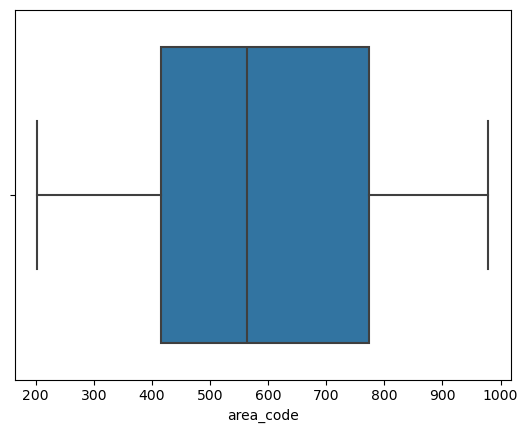

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


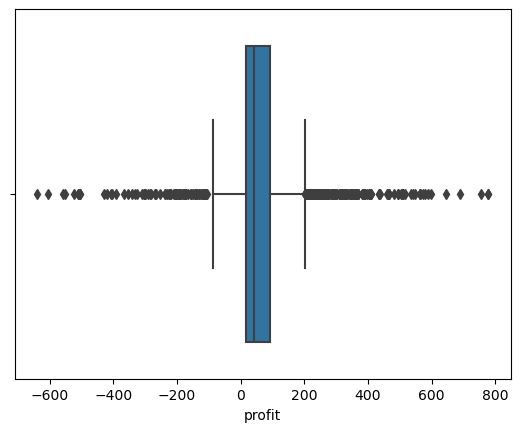

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


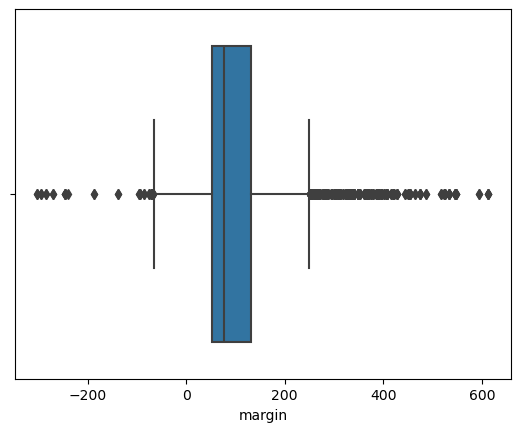

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


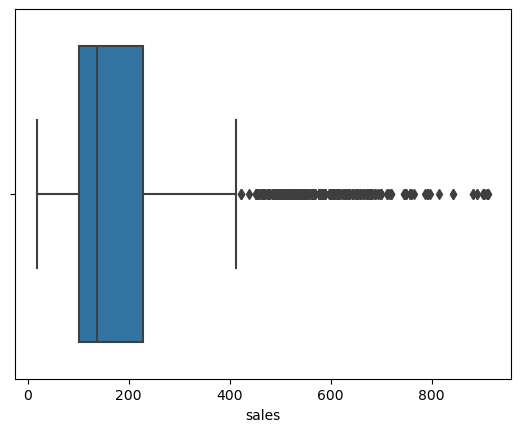

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


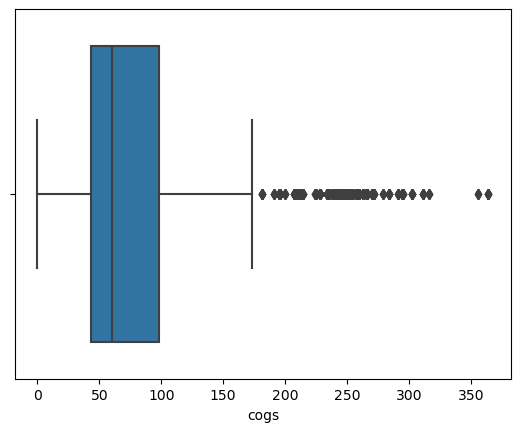

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


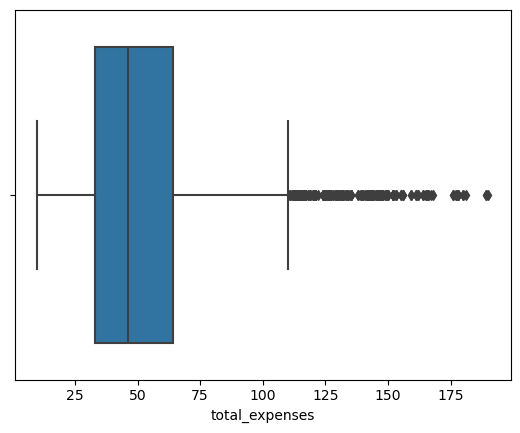

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


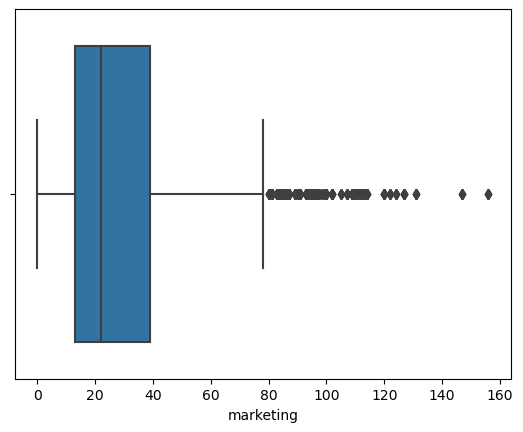

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


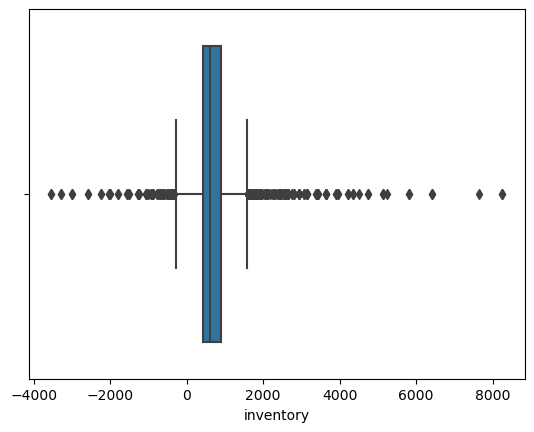

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


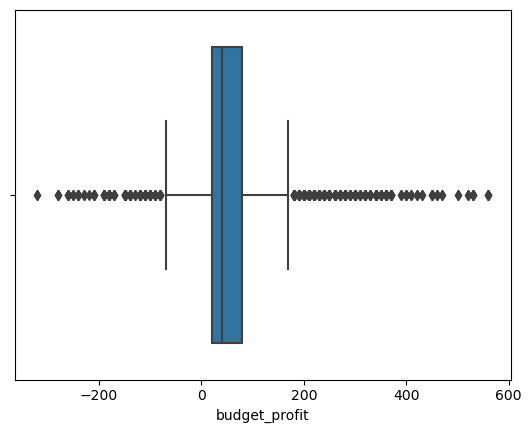

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


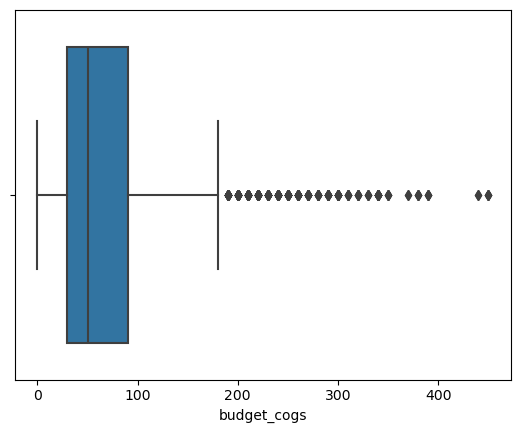

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


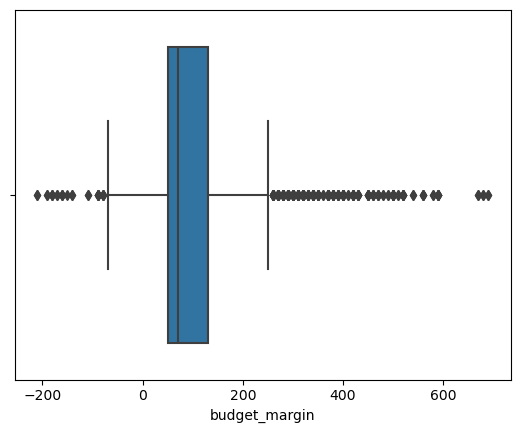

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


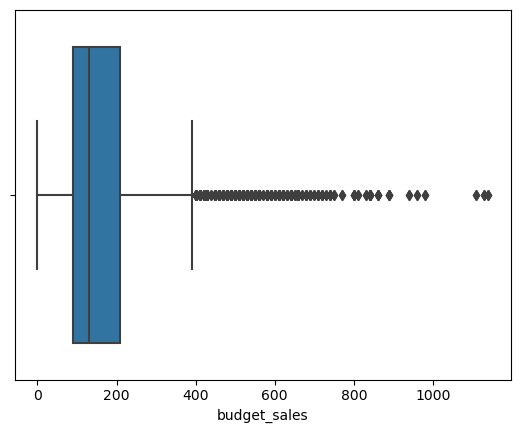

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


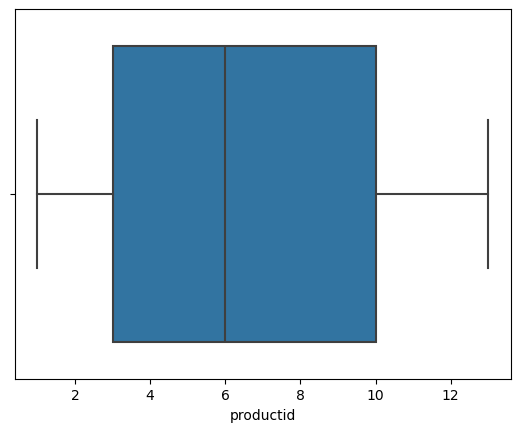

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


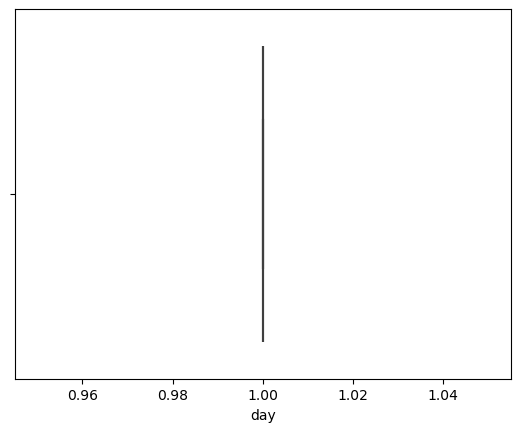

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


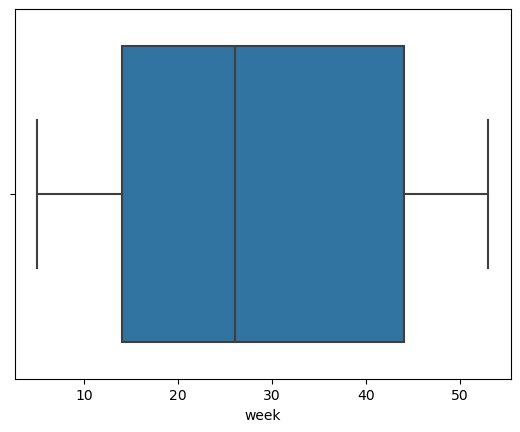

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


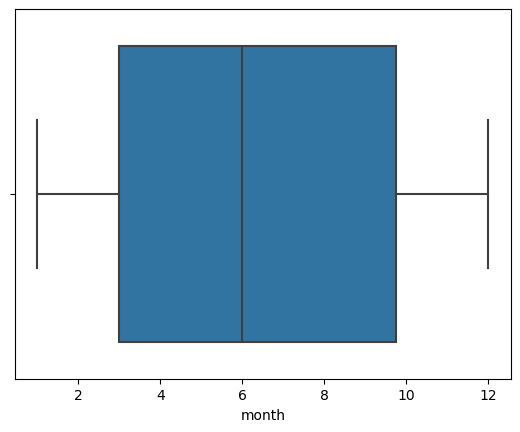

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


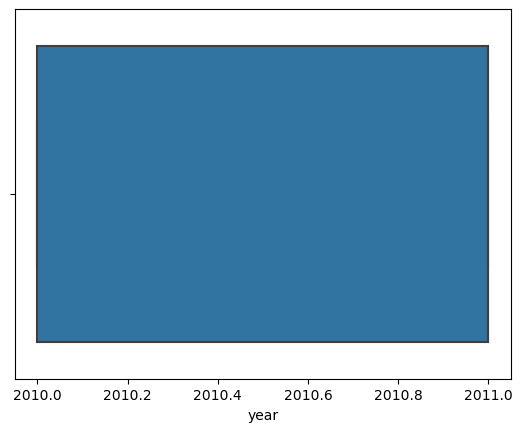

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


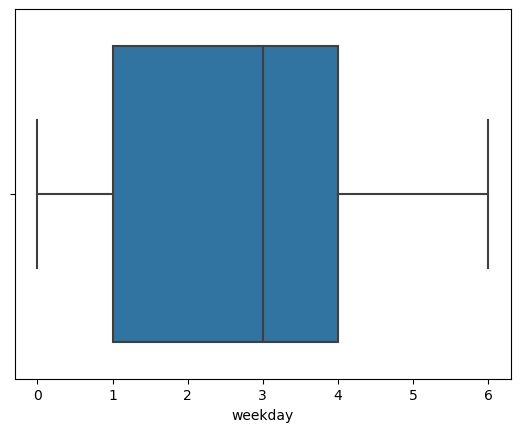

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


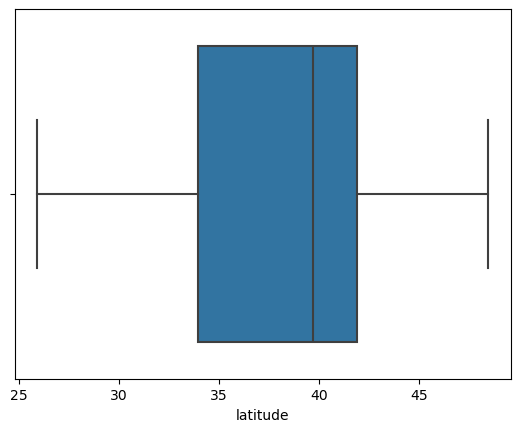

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


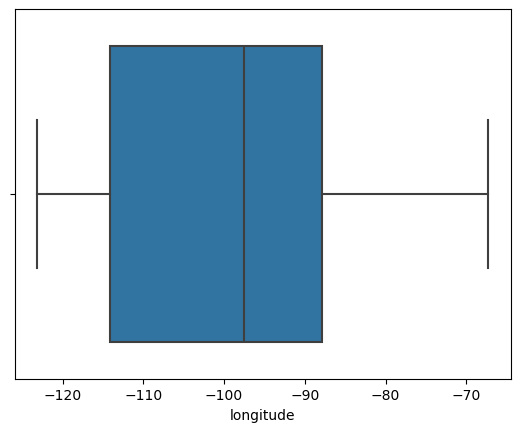

In [147]:
outlier(numerical_Total_df)

In [ ]:
# No clear single outliers that would have to be excluded, for features where it would make sense
# There are only many high and low values, no clear outliers

# Exploratory Data Analysis (EDA) total dataframe

In [148]:
numerical_Total_df.columns

Index(['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid', 'day', 'week', 'month',
       'year', 'weekday', 'latitude', 'longitude'],
      dtype='object')

In [149]:
Numerical_columns_to_plot = ['profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid']

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


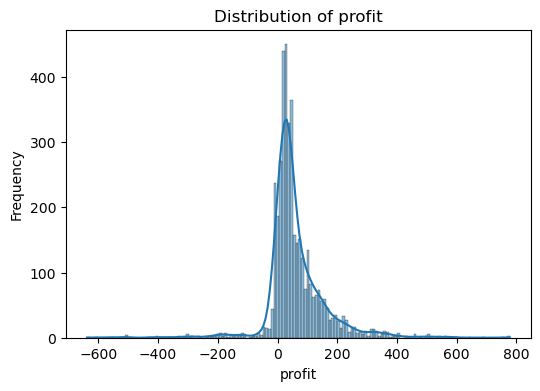

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


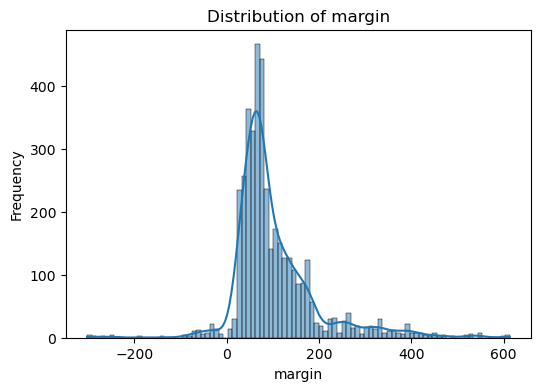

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


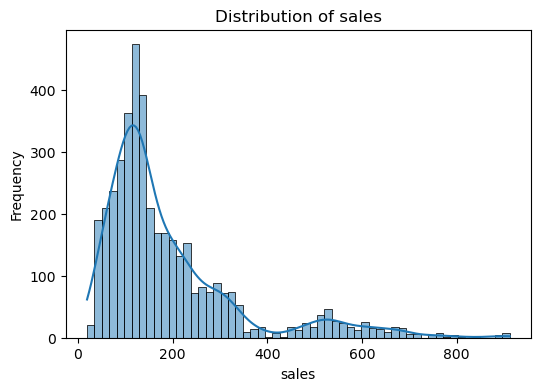

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


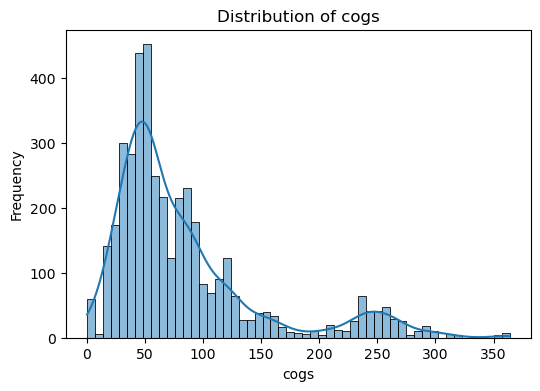

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


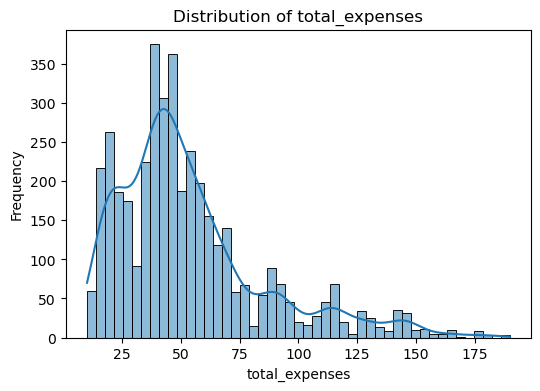

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


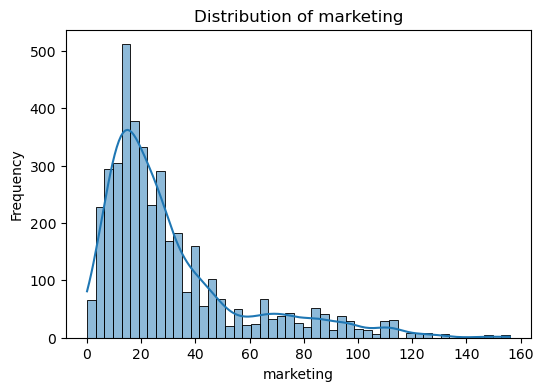

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


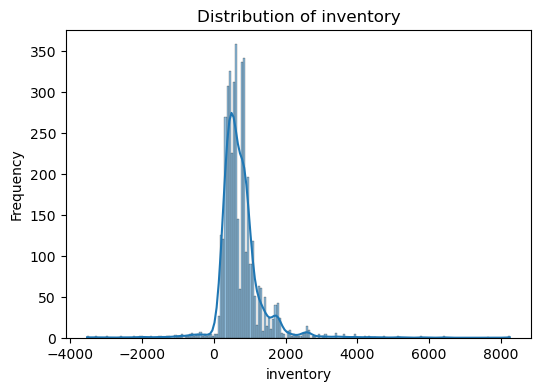

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


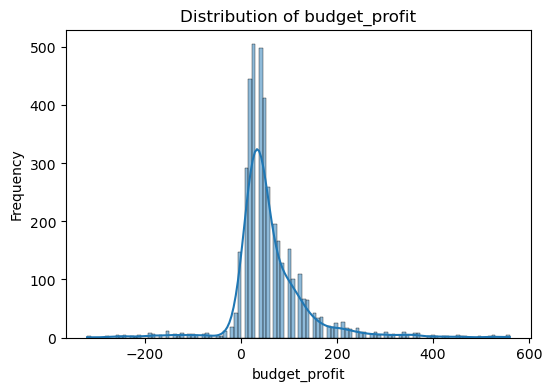

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


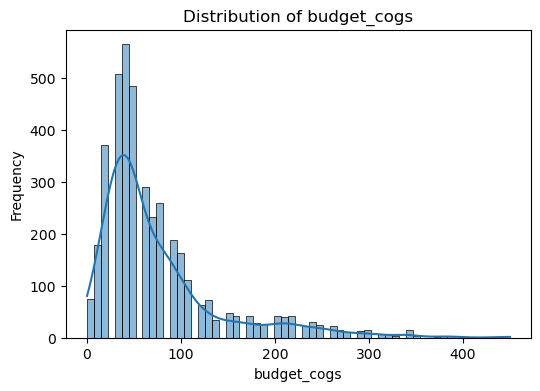

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


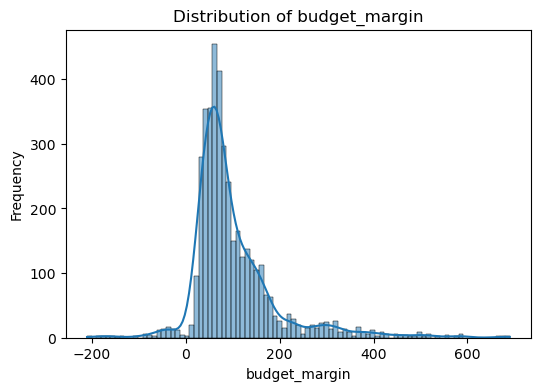

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


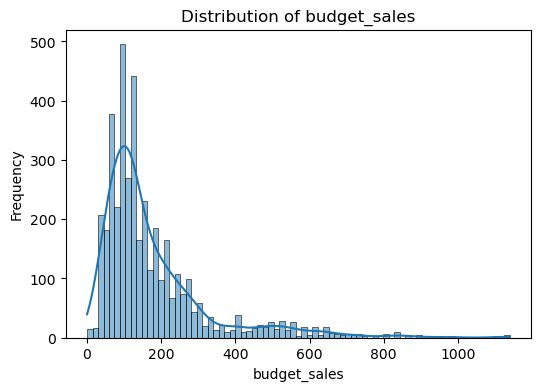

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


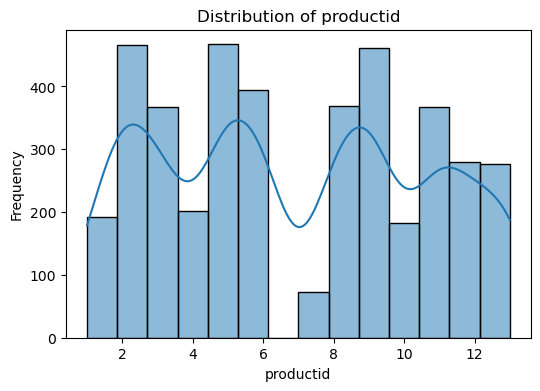

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selected_numerical_variables(data, columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=data, x=column, kde=True)  # Change df to data
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_selected_numerical_variables(numerical_Total_df, ['profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid'])

In [ ]:
# numerical plots:
    # Distributions characteristics 
    # All the distributions are right skewed (except product ID unique identifier)
    # There are similarities in the shape of the distribution of the single budgets but differences in the extreme values (min, max)
        # Lets look into the statistics of the numerical features

In [166]:
numerical_Total_df.describe()

area_code       profit       margin        sales         cogs  \
count  4098.000000  4098.000000  4098.000000  4098.000000  4098.000000   
mean    575.824061    61.496096   104.165691   191.730112    83.352123   
std     221.459726    98.875758    91.840214   148.901969    65.821021   
min     203.000000  -638.000000  -302.000000    19.000000     0.000000   
25%     415.000000    17.000000    53.000000   102.000000    43.000000   
50%     563.000000    41.000000    76.000000   138.000000    60.000000   
75%     773.000000    91.000000   132.000000   228.000000    98.000000   
max     979.000000   778.000000   613.000000   912.000000   364.000000   

       total_expenses    marketing    inventory  budget_profit  budget_cogs  \
count     4098.000000  4098.000000  4098.000000    4098.000000  4098.000000   
mean        53.513665    30.720595   737.172035      61.449488    74.470473   
std         31.711722    26.429329   630.287584      78.799248    66.387853   
min         10.000000     0.000000 -3534.000000    -320.000000     0.000000   
25%         33.000000    13.000000   428.000000      20.000000    30.000000   
50%         46.000000    22.000000   617.000000      40.000000    50.000000   
75%         64.000000    39.000000   894.000000      80.000000    90.000000   
max        190.000000   156.000000  8252.000000     560.000000   450.000000   

       budget_margin  budget_sales    productid     day       week  \
count    4098.000000   4098.000000  4098.000000  4098.0     4098.0   
mean      101.032211    175.502684     6.873597     1.0  28.420449   
std        92.163450    149.165128     3.668817     0.0  15.034048   
min      -210.000000      0.000000     1.000000     1.0        5.0   
25%        50.000000     90.000000     3.000000     1.0       14.0   
50%        70.000000    130.000000     6.000000     1.0       26.0   
75%       130.000000    210.000000    10.000000     1.0       44.0   
max       690.000000   1140.000000    13.000000     1.0       53.0   

             month         year      weekday     latitude    longitude  
count  4098.000000  4098.000000  4098.000000  4098.000000  4098.000000  
mean      6.493411  2010.500976     2.705466    38.432069   -99.479126  
std       3.454658     0.500060     1.903807     5.117150    16.344577  
min       1.000000  2010.000000     0.000000    25.910000  -123.110000  
25%       3.000000  2010.000000     1.000000    33.940000  -114.090000  
50%       6.000000  2011.000000     3.000000    39.710000   -97.510000  
75%       9.750000  2011.000000     4.000000    41.890000   -87.840000  
max      12.000000  2011.000000     6.000000    48.450000   -67.270000

 budget_profit:

     Mean: $61.45
     Standard Deviation: $78.80
     Minimum: -$320.00
     25th Percentile: $20.00
     Median: $40.00
     75th Percentile: $80.00
     Maximum: $560.00

budget_cogs:

    Mean: $74.47
    Standard Deviation: $66.39
    Minimum: $0.00
    25th Percentile: $30.00
    Median: $50.00
    75th Percentile: $90.00
    Maximum: $450.00

budget_margin:

    Mean: 101.03%
    Standard Deviation: 92.16%
    Minimum: -210.00%
    25th Percentile: 50.00%
    Median: 70.00%
    75th Percentile: 130.00%
    Maximum: 690.00%
    budget_sales:



In [ ]:
# Add Scatterplots to show correlations

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='X', y='Y')

# Adds a regression line to the plot
sns.regplot(data=df1, x='X', y='Y', scatter=False, color='red')

plt.title('Relationship between X and Y')
plt.xlabel('X value in unit ?')
plt.ylabel('Y value in unit ?')
plt.show()

In [151]:
categorical_Total_df.columns

Index(['state', 'market', 'market_size', 'date', 'product_type', 'product',
       'type', 'area_code_and_state'],
      dtype='object')

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


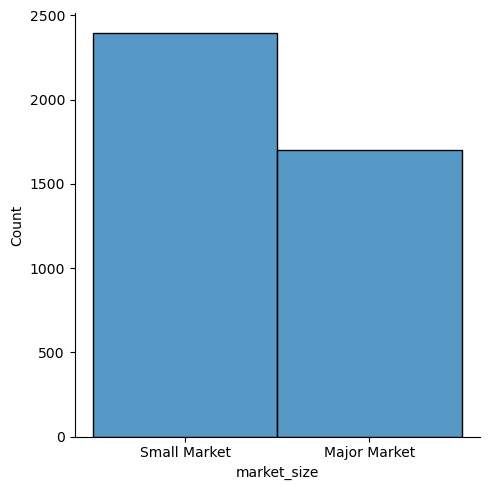

In [152]:
sns.displot(Total_df['market_size'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='market_size', ylabel='sales'>

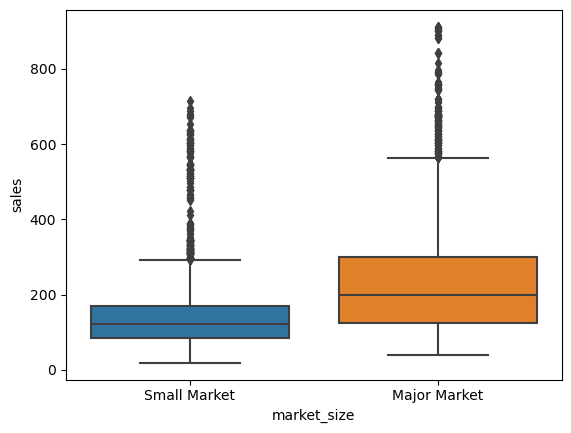

In [153]:
#Boxplots
#Looking at the relationship between Market size and Sales:
sns.boxplot(data=Total_df, x="market_size", y="sales")

In [154]:
Total_df['market_size'].value_counts()

market_size
Small Market    2394
Major Market    1704
Name: count, dtype: int64

In [155]:
# Small abd Major Markets
    # Major markets have a significantly higher median sales vlaue

In [156]:
#

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


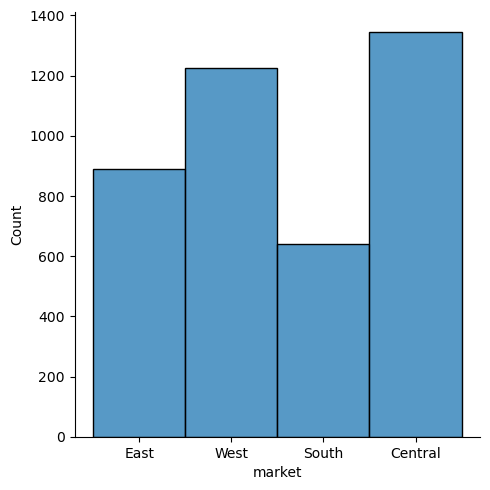

In [157]:
sns.displot(Total_df['market'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='market', ylabel='sales'>

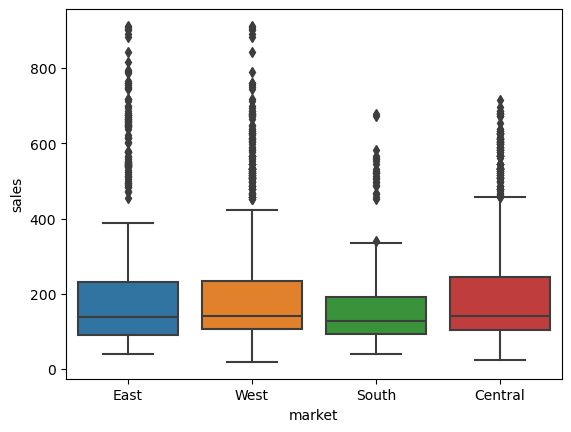

In [158]:
#Boxplots
#Looking at the relationship between Market and Sales:
sns.boxplot(data=Total_df, x="market", y="sales")

In [159]:
# Looking into the state column

In [160]:
Total_df['state'].nunique()

20

In [161]:
# The stores distribution is not equal over the different states
Total_df['state'].value_counts()

state
Utah             288
California       288
Colorado         264
Oregon           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
New Hampshire    168
New Mexico       168
Connecticut      168
Oklahoma         168
Texas            168
Massachusetts    144
Nevada           144
Louisiana        138
Name: count, dtype: int64

In [162]:
# Looking into the market column

In [163]:
# There are 4 different markets ['East' 'West' 'South' 'Central']
Total_df['market'].nunique()

4

In [164]:
# The distribution between the markets is not equal 
# East an south are underrepresented in the amount of markets observed in this area
Total_df['market'].value_counts()

market
Central    1344
West       1224
East        888
South       642
Name: count, dtype: int64

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='product', ylabel='count'>

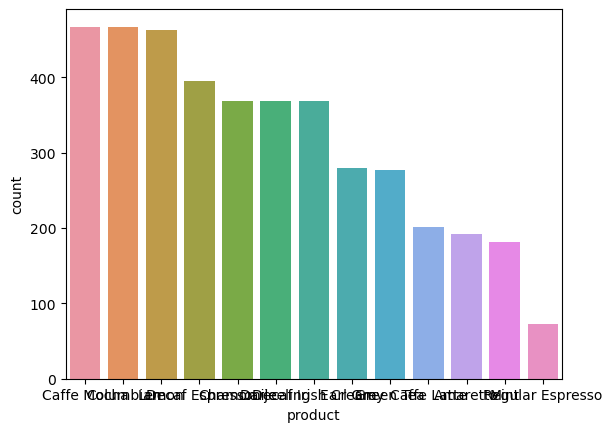

In [165]:
# Show countplot in descending order for Procucts
# I found following source https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-seaborn-countplot

sns.countplot(x = 'product',
              data = Total_df,
              order = Total_df['product'].value_counts().index)

In [ ]:
# north west weather differences

In [ ]:
# Differences between 
    # states
    # regions 
    # store sizes

# Model building

In [167]:
categorical_Total_df.columns


Index(['state', 'market', 'market_size', 'date', 'product_type', 'product',
       'type', 'area_code_and_state'],
      dtype='object')

In [168]:
numerical_Total_df.columns

Index(['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid', 'day', 'week', 'month',
       'year', 'weekday', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# First drop the features you were planning to drop after analysing the main dataset and Total_df
    # newly created columns drop area_code_and_state
    # day, week drop information redundant with date feature

In [ ]:
columns_to_drop_main_numerical = ['budget_profit', 'budget_margin', 'budget_sales']
columns_to_drop_main_categorical = ['product_type', 'type', 'market_size', 'area_code_and_state']


In [ ]:
# numerical columns
cols_to_scale = ['', '', '', '', '']
cols_to_scale = 
# categorical columns 
cols_one_hot_encode = ['', '']
cols_one_hot_encode = 

In [ ]:
#splitting X and Y
X = Total_df.drop(['sales'],axis=1)
y = Total_df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creating X_train_num & X_test_num
X_train_num = X_train[cols_to_scale]

In [ ]:
X_test_num = X_test[cols_to_scale]

In [ ]:
#Scaling X_train_num
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
x_standardized = MinMaxtransformer.transform(X_train_num)
print(x_standardized.shape)
X_train_num_s = pd.DataFrame(x_standardized, columns=X_train_num.columns)
X_train_num_s

In [ ]:
#Using trained scaler to scale X_test_num
x_standardized = MinMaxtransformer.transform(X_test_num)
print(x_standardized.shape)
X_test_num_s = pd.DataFrame(x_standardized, columns=X_test_num.columns)
X_test_num_s

In [ ]:
# Chosing the columns I want to chose for One hot encoding, too many unique values are not suitable for it!

In [ ]:
X_train_cat = X_train[cols_one_hot_encode].astype(object)
X_test_cat = X_test[cols_one_hot_encode].astype(object)

In [ ]:
#One-hot encoding X_train_cat
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_onehot_encoded = pd.DataFrame(encoded, columns=cols)
X_train_cat_onehot_encoded

In [ ]:
#One-hot encoding X_test_cat
encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_onehot_encoded = pd.DataFrame(encoded, columns=cols)
X_test_cat_onehot_encoded

In [ ]:
#Concatenating X_train from X_train_num_s & X_train_cat_onehot_encoded
X_train = pd.concat([X_train_num_s, X_train_cat_onehot_encoded], axis=1)
display(X_train.dtypes)
X_train

In [ ]:
#Repeting for X_Test
X_test = pd.concat([X_test_num_s, X_test_cat_onehot_encoded], axis=1)

In [ ]:
# Evaluate the model 

def models_automation(models, X_tr, y_tr,X_te, y_te):
    R_score_train = []
    R_score_test = []
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")
        R_score_train.append(model.score(X_tr, y_tr))
        R_score_test.append(model.score(X_te, y_te))
    column_names=["R_score_train","R_score_test"]
    results = pd.DataFrame({'R_score_train': R_score_train, 'R_score_test': R_score_test})
    return results

In [ ]:
# Model evaluation
    # Root Mean Square Error

# Optimization of parameters??

# Conclusion

# Code Snippets

In [ ]:
#Example fill with Mode
# Your code here  I chose 'F' to fill nans because it is the mode.
data['gender']= data['gender'].fillna('F')

In [ ]:
# Plotting categorical

In [ ]:
#Show a plot of Income by State.
sns.barplot(y='income', x='state', data=data)

In [ ]:
this graph from https://datascience.stackexchange.com/questions/89692/plot-two-categorical-variables
rotated labels from https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn

In [ ]:
#Show a plot of the Education by Vehicle Class.
g = sns.histplot(x="education", hue="vehicle_class", data=data, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)